In [1]:
import pandas as pd
import numpy as np

# First binomial test and extracting distance

The purpose of this workbook is to perform the first binomial test on data where the self-citations have been removed, then merge with location data and calculate the distance between original and citations/controls. The results are then outputted and used in Final_data_exploration.ipynb

The first binomial test is performed to consider whether the citing dataset percentage within local, regional and country boundary exceeds that of the control dataset.

# Binomial test

First read in data and check how many cited and citing patents there are.

In [3]:
#this data comes from: removing self controls and splitting controls.ipynb
EPO_treatment = pd.read_csv("Patents data/EPO_cited&citing_noself.csv")
PCT_treatment = pd.read_csv("Patents data/PCT_cited&citing_noself.csv")

#in order to find the number of cited patents we need to find the unique application numbers from both the PCT
#and the EPO dataset
number_of_cited = len(list(EPO_treatment["Cited_App_nbr"].unique()))+len(list(PCT_treatment["Cited_App_nbr"].unique()))
print("The number of unique patents cited are: " + number_of_cited)

#To find the numver of citations from each dataset, the length can be used as each pairing is unique
number_of_pairs = len(EPO_treatment)+len(PCT_treatment)
print("The number of citations are: " + number_of_pairs)

44019
147254


### EPO

First read in the both the treatment and control datasets, removing any uncessary columns

In [2]:
#this data comes from: removing self controls and splitting controls.ipynb
EPO_treatment = pd.read_csv("Patents data/EPO_cited&citing_noself.csv")
#Unecessary columns can be removed
EPO_treatment.drop(["prio_year", "Citing_IPC", "IPC_subclass", "Cited_firm_id", "citing_firm_id",
                    "Cited_ind_id", "citing_ind_id"], axis = 1, inplace = True)

In [3]:
#this data comes from: removing self controls and splitting controls.ipynb
#The control data is read in seperately
EPO_ctrl = pd.read_csv("Patents data/EPO_cited&ctrl_noself.csv")
#Again unecessary columns can be removed
EPO_ctrl.drop(["Cited_Appln_id", "prio_year", "IPC_subclass", "Control_IPC", 
               "Cited_firm_id", "citing_firm_id", "Cited_ind_id", "citing_ind_id"]
             , axis =1, inplace = True)

The data from the above datasets only refers to the applications. Therefore, for the purpose of extracting distance, we want individuals that are associated with each application. 

For this, the patent numbers are extracted from both the treatment and control datasets, which are then used to subset the individual results from the EPO and PCT dataset. These results are then used to get the regions to which individuals are assigned, which are used to form the basis of the binomial test.

In [4]:
#We want to extract the relevant individuals from the EPO and PCT datasets
#So lists of the application number can be taken from both the treatment and control datasets
EPO_cited_list = list(EPO_treatment["Cited_App_nbr"])
EPO_citing_list = list(EPO_treatment["Citing_app_nbr"])
EPO_ctrl_list = list(EPO_ctrl["Control_appln_id"].dropna())
EPO_ctrl_PCT_list = list(EPO_ctrl["Control_pct_nbr"].dropna())

In [5]:
#We then read in the EPO and PCT ind datasets which contain information on the individuals from both datatsets
EPO_ind = pd.read_csv("Patents data/202001_EPO_Inv_reg.txt", sep = "|", header = 0)
PCT_ind = pd.read_csv("Patents data/202001_PCT_Inv_reg.txt", sep = "|", header = 0)

In [6]:
#Then using the lists created above with the application number of application id, the ind data can be subsetted
EPO_ind_cited = EPO_ind[EPO_ind["app_nbr"].isin(EPO_cited_list)]

In [7]:
EPO_ind_citing = EPO_ind[EPO_ind["app_nbr"].isin(EPO_citing_list)]

In [8]:
EPO_ind_ctrl = EPO_ind[EPO_ind["appln_id"].isin(EPO_ctrl_list)]


In [9]:
EPO_ind_ctrl_PCT = PCT_ind[PCT_ind["pct_nbr"].isin(EPO_ctrl_PCT_list)]

These individual datasets contain information on NUTS3 localities, which considering we are interested in regional matches as well these need to be coordinated with NUTS1 localities as well.

Given that our cited dataset only contains patents that originate within the UK, we can use the UK NUTS classification from 2010 (as they use from the OECD REGPAT database) to link NUTS3 scale to NUTS2 and NUTS1. 

There is no lookup table for this set and so our own has to be created.

In [14]:
#This look up table had been created on the basis of the following link
#https://ec.europa.eu/eurostat/documents/345175/7451602/nuts-map-UK.pdf
#This is based on NUTS classifications for the UK in 2010
    
data = {'NUTS3': ["UKC11", "UKC12", "UKC13", "UKC14",
                 "UKC21", "UKC22", "UKC23",
                 "UKD11", "UKD12",
                  
                 "UKD31", "UKD32", 
                 "UKD41","UKD42","UKD43",
                 "UKD61", "UKD62", "UKD63",
                  
                  "UKD71", "UKD72", "UKD73", "UKD74",
                 "UKE11", "UKE12", "UKE13", "UKE2",
                 "UKE21", "UKE22", "UKE31", "UKE32", 
                 "UKE41", "UKE42", "UKE44", "UKE45",
                  
                 "UKF11", "UKF12", "UKF13", "UKF14", "UKF15", "UKF16",
                 "UKF21", "UKF22", "UKF24", "UKF25",
                 "UKF30",
                 "UKG11", "UKG12", "UKG13",
                  
                 "UKG21", "UKG22", "UKG23", "UKG24"
                  ,"UKG31","UKG32","UKG33","UKG36","UKG37","UKG38","UKG39"
                  ,"UKH11","UKH12","UKH13","UKH14"
                  ,"UKH21","UKH23","UKH24","UKH25"
                  
                  ,"UKH31","UKH32","UKH33"
                  ,"UKI11","UKI12"
                  ,"UKI21","UKI22","UKI23"
                  
                  ,"UKJ11","UKJ12","UKJ13","UKJ14"
                  ,"UKJ21","UKJ22","UKJ23","UKJ24"
                  ,"UKJ31","UKJ32","UKJ34","UKJ33"
                  
                  ,"UKJ41","UKJ42"#,"UKJ44","UKJ45","UKJ46"
                  ,"UKK11","UKK12","UKK13","UKK14","UKK15"
                  ,"UKK21","UKK22","UKK23"
                  ,"UKK30"
                  
                  ,"UKK41","UKK42","UKK43"
                  ,"UKL11","UKL12","UKL13","UKL14","UKL15","UKL16","UKL17","UKL18"
                  ,"UKL21", "UKL22", "UKL23", "UKL24"
                  
                  ,"UKM21","UKM22","UKM23","UKM24","UKM25","UKM26","UKM27","UKM28"
                  ,"UKM31","UKM32","UKM33","UKM34","UKM35","UKM36","UKM37","UKM38"
                  ,"UKM50"
                  ,"UKM61","UKM62","UKM63","UKM64","UKM65","UKM66"
                  ,"UKN01","UKN02","UKN03","UKN04","UKN05"
                  ,"UKZZZ",
                  "GBZZZ"
                 ],
        "NUTS2": ["UKC1","UKC1","UKC1","UKC1",
                 "UKC2","UKC2","UKC2",
                  "UKD1", "UKD1",
                  
                  "UKD3","UKD3",
                  "UKD4","UKD4","UKD4",
                  "UKD6","UKD6","UKD6",
                  
                  "UKD7","UKD7","UKD7","UKD7",
                  "UKE1", "UKE1", "UKE1", "UKE1",
                  "UKE2", "UKE2", "UKE3", "UKE3",
                  "UKE4", "UKE4", "UKE4", "UKE2",
                  
                  "UKF1","UKF1","UKF1","UKF1","UKF1","UKF1",
                  "UKF2","UKF2","UKF2","UKF2",
                  "UKF3",
                  "UKG1","UKG1","UKG1",
                  
                  "UKG2","UKG2","UKG2","UKG2",
                  "UKG3","UKG3","UKG3","UKG3","UKG3","UKG3","UKG3",
                  "UKH1","UKH1","UKH1","UKH1",
                  "UKH2","UKH2","UKH2","UKH2",
                  
                  "UKH3","UKH3","UKH3",
                  "UKI1", "UKI1",
                  "UKI2","UKI2", "UKI2",
                  
                  "UKJ1","UKJ1","UKJ1","UKJ1",
                  "UKJ2","UKJ2","UKJ2","UKJ2",
                  "UKJ3","UKJ3","UKJ3","UKJ3",
                  
                  "UKJ4","UKJ4",#"UKJ4","UKJ4","UKJ4",
                  "UKK1","UKK1","UKK1","UKK1","UKK1",
                  "UKK2","UKK2","UKK2",
                  "UKK3",
                  
                  "UKK4","UKK4","UKK4",
                  "UKL1","UKL1","UKL1","UKL1","UKL1","UKL1","UKL1","UKL1",
                  "UKL2","UKL2","UKL2","UKL2",
                  
                  "UKM2","UKM2","UKM2","UKM2","UKM2","UKM2","UKM2","UKM2",
                  "UKM3","UKM3","UKM3","UKM3","UKM3","UKM3","UKM3","UKM3",
                  "UKM5",
                  "UKM6","UKM6","UKM6","UKM6","UKM6","UKM6",
                  "UKN0","UKN0","UKN0","UKN0","UKN0",
                  "UKZZ",
                  "GBZZ"
                 ],
       
       "NUTS1": ["UKC","UKC","UKC","UKC","UKC","UKC","UKC","UKC",
                 "UKD","UKD","UKD","UKD","UKD","UKD","UKD","UKD","UKD","UKD","UKD","UKD","UKD","UKD",
                 "UKE","UKE","UKE","UKE","UKE","UKE","UKE","UKE","UKE","UKE","UKE",
                 "UKF","UKF","UKF","UKF","UKF","UKF","UKF","UKF","UKF","UKF","UKF",
                 "UKG","UKG","UKG","UKG","UKG","UKG","UKG","UKG","UKG","UKG","UKG","UKG","UKG","UKG",
                 "UKH","UKH","UKH","UKH","UKH","UKH","UKH","UKH","UKH","UKH","UKH",
                 "UKI","UKI","UKI","UKI","UKI",
                "UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ","UKJ",
                 "UKK","UKK","UKK","UKK","UKK","UKK","UKK","UKK","UKK","UKK","UKK","UKK",
                 "UKL","UKL","UKL","UKL","UKL","UKL","UKL","UKL","UKL","UKL","UKL","UKL",
                 "UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM",
                 "UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM","UKM",
                 "UKN","UKN","UKN","UKN","UKN",
                 "UKZ",
                 "GBZ"
                ]}

#This then put into a dataframe so that it can be merged within ind data
UK_nuts = pd.DataFrame(data = data)

Once the look up table has been created, this can then be merged with the ind data to convert NUTS3 classifications to NUTS 1 and NUTS2. 

In [15]:
#The cited, citing and control datasets are thus merged with the UK_NUTS dataframe created above.
#This is done by merging on left as we want all ind data to remain, but only those who match at the NUTS3
#level to match to UK NUTS2 and 1 boundaries
EPO_ind_cited = EPO_ind_cited.merge(UK_nuts, left_on= "reg_code", right_on = "NUTS3", how = "left")
EPO_ind_citing = EPO_ind_citing.merge(UK_nuts, left_on = "reg_code", right_on = "NUTS3", how = "left")
EPO_ind_ctrl = EPO_ind_ctrl.merge(UK_nuts, left_on = "reg_code", right_on = "NUTS3", how = "left")
EPO_ind_ctrl_PCT = EPO_ind_ctrl_PCT.merge(UK_nuts, left_on = "reg_code", right_on = "NUTS3", how = "left")

The next stage is to then, for each patent, create a list of the regions that individuals come from.

This is done on the basis of all individuals who are associated with that patent applicant as we want to know whether there is a single match between the cited and the citing/control regions.

In [16]:
#Thus each application number is grouped, creating lists of the country code, region code and the NUTS1 code 
#This is so they can then be compared
EPO_ind_cited_grouped = EPO_ind_cited.groupby("app_nbr").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                             'NUTS1': lambda x:x.to_list()})


#An alternative solution to this was to identify the most common: country, local and region
#However this does not work for the purposes here and thus the solution is commented out

#from collections import Counter

#ctry_most_common = []
#reg_most_common = []

#https://stackoverflow.com/questions/3594514/how-to-find-most-common-elements-of-a-list
#for a in EPO_ind_cited_grouped.index:
#    c = Counter(EPO_ind_cited_grouped["ctry_code"][a])
#    b = c.most_common(1)
#    ctry_most_common.append(b[0][0])
#    d = Counter(EPO_ind_cited_grouped["reg_code"][a])
#    e = d.most_common(1)
#    reg_most_common.append(e[0][0])
    
#EPO_ind_cited_grouped["Country"] = ctry_most_common
#EPO_ind_cited_grouped["Reg"] = reg_most_common

In [17]:
#The next thing to do is reste the index such that app_nbr can be called later as the column to merge
EPO_ind_cited_grouped.reset_index(inplace = True)

#EPO_ind_cited_grouped.drop(["ctry_code", "reg_code"], axis = 1, inplace = True)

#The results can then be checked
EPO_ind_cited_grouped

,app_nbr,ctry_code,reg_code,NUTS1
0,EP19780100247,[GB],[UKK30],[UKK]
1,EP19780100395,[GB],[UKJ42],[UKJ]
2,EP19780100463,[GB],[UKJ42],[UKJ]
3,EP19780100492,[GB],[UKJ22],[UKJ]
4,EP19780100645,[GB],[UKD63],[UKD]
5,EP19780100690,[GB],[UKH23],[UKH]
6,EP19780100717,[GB],[UKI23],[UKI]
7,EP19780100753,[GB],[UKI22],[UKI]
8,EP19780100754,[GB],[UKI22],[UKI]
9,EP19780100823,"[GB, GB]","[UKJ42, UKJ42]","[UKJ, UKJ]"


The same process then occurs for the citing, focusing on the treatment here.

In [18]:
EPO_ind_citing_grouped = EPO_ind_citing.groupby("app_nbr").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                             'NUTS1': lambda x:x.to_list()})

#from collections import Counter

#ctry_most_common = []
#reg_most_common = []


#for a in EPO_ind_citing_grouped.index:
#    c = Counter(EPO_ind_citing_grouped["ctry_code"][a])
#    b = c.most_common(1)
#    ctry_most_common.append(b[0][0])
#    d = Counter(EPO_ind_citing_grouped["reg_code"][a])
#    e = d.most_common(1)
#    reg_most_common.append(e[0][0])
    
#EPO_ind_citing_grouped["Country"] = ctry_most_common
#EPO_ind_citing_grouped["Reg"] = reg_most_common

In [19]:
EPO_ind_citing_grouped.reset_index(inplace = True)
#EPO_ind_citing_grouped.drop(["ctry_code", "reg_code"], axis = 1, inplace = True)
EPO_ind_citing_grouped

,app_nbr,ctry_code,reg_code,NUTS1
0,EP19780101388,"[US, US]","[US34023, US34023]","[nan, nan]"
1,EP19790101299,"[AT, AT, AT, AT, AT, AT]","[AT130, AT130, AT130, AT127, AT130, AT130]","[nan, nan, nan, nan, nan, nan]"
2,EP19790101477,[DE],[DEF0C],[nan]
3,EP19790102118,"[CH, CH, CH, CH]","[CH032, CH031, CH032, CH032]","[nan, nan, nan, nan]"
4,EP19790103431,"[JP, JP, JP, JP, JP, JP]","[JPG27, JPG25, JPC09, JPD11, JPG26, JPG25]","[nan, nan, nan, nan, nan, nan]"
5,EP19790103733,[GB],[UKI23],[UKI]
6,EP19790103965,"[DE, DE, DE]","[DEA2B, DEA1A, DEA1A]","[nan, nan, nan]"
7,EP19790104192,"[JP, JP, JP, JP, JP, JP]","[JPD14, JPD14, JPD14, JPD14, JPD14, JPD14]","[nan, nan, nan, nan, nan, nan]"
8,EP19790104652,"[US, US]","[US10003, USZZZ]","[nan, nan]"
9,EP19790105053,"[DE, DE, DE]","[DE126, DEB34, DEB3C]","[nan, nan, nan]"


These results can then be merged with the treatment data, so that each cited/citing pair is associated with country code, regional code and NUTS1 code. 

This is so that any matches can be identified and used to calculate the percentages for the binomial t-test.

In [20]:
#The treatment is merged with the cited and citing grouped data based on the app_nbr value
EPO_treatment = EPO_treatment.merge(EPO_ind_cited_grouped, left_on = "Cited_App_nbr", right_on = "app_nbr", how = "left")
EPO_treatment = EPO_treatment.merge(EPO_ind_citing_grouped, left_on = "Citing_app_nbr", right_on = "app_nbr", how = "left")

In [21]:
EPO_treatment

,index,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,app_nbr_x,ctry_code_x,reg_code_x,NUTS1_x,app_nbr_y,ctry_code_y,reg_code_y,NUTS1_y
0,0,EP19780101388,16428374,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19780101388,"[US, US]","[US34023, US34023]","[nan, nan]"
1,1,EP19790301944,16438624,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19790301944,[GB],[UKI23],[UKI]
2,2,EP19790302384,16439056,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19790302384,[GB],[UKJ23],[UKJ]
3,3,EP19790302384,16439056,EP19790300096,16436815.0,EP19790300096,[GB],[UKI23],[UKI],EP19790302384,[GB],[UKJ23],[UKJ]
4,4,EP19820305125,16503864,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19820305125,"[JP, JP, JP]","[JPD14, JPD14, JPD14]","[nan, nan, nan]"
5,5,EP19880810407,16740869,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19880810407,"[FR, CH, CH]","[FR422, CH033, CH031]","[nan, nan, nan]"
6,6,EP20080163922,201033,EP19790300096,16436815.0,EP19790300096,[GB],[UKI23],[UKI],EP20080163922,"[DE, DE, CH, DE, CH, DE, DE, DE, DE, ES, CA]","[DE408, DE300, CH031, DED21, CH021, DE300, DE7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7,7,EP19790102118,16432764,EP19780300203,16429410.0,EP19780300203,[GB],[UKJ11],[UKJ],EP19790102118,"[CH, CH, CH, CH]","[CH032, CH031, CH032, CH032]","[nan, nan, nan, nan]"
8,8,EP19790102118,16432764,EP19780300853,16430044.0,EP19780300853,[GB],[UKJ11],[UKJ],EP19790102118,"[CH, CH, CH, CH]","[CH032, CH031, CH032, CH032]","[nan, nan, nan, nan]"
9,9,EP19790103431,16434023,EP19780300203,16429410.0,EP19780300203,[GB],[UKJ11],[UKJ],EP19790103431,"[JP, JP, JP, JP, JP, JP]","[JPG27, JPG25, JPC09, JPD11, JPG26, JPG25]","[nan, nan, nan, nan, nan, nan]"


The next step is therefore to identify any matches between the cited and the citing patents at the local (NUTS3), regional and country scale and attach that to the treatment dataframe.

In [22]:

#empty lists are created for the country, region and local match
country_match = []
region_match = []
local_match = []

#A loop is used, iterating over each row
#a becomes the index for each row
for a in EPO_treatment.index:
    
    #fistly for the country level in row a
    country = []
    #look at the values in the country codes for the cited patents
    for val in EPO_treatment["ctry_code_x"][a]:
        #If that value is subsequently in the country code list for the citing patent
        if val in EPO_treatment["ctry_code_y"][a]:
            #Then this value is appended to the empty county list
            country.append(val)
    #Then for each row, if the country list len >=1:
    if len(country) >= 1:
        #Add a 1 value to indicate that there is a match
        country_match.append(1)
    #otherwise add a 0
    #this is done so that the length of the match list is the same length as that of the dataframe
    else:
        country_match.append(0)
        
    #The same process is then repeated for the local and region level
    local_a = []
    for local in EPO_treatment["reg_code_x"][a]:
        if local in EPO_treatment["reg_code_y"][a]:
            local_a.append(local)
    if "GBZZZ" not in local_a:
        if len(local_a) >= 1:
            local_match.append(1)
        else:
            local_match.append(0)
    else:
        local_match.append(0)
        
    region_a = []
    for region in EPO_treatment["NUTS1_x"][a]:
        if region in EPO_treatment["NUTS1_y"][a]:
            region_a.append(region)
    if "GBZ" not in region_a:
        if len(region_a) >=1:
            region_match.append(1)
        else:
            region_match.append(0)
    else:
        region_match.append(0)
        
        
#The results are then assigned to a column in the EPO treatment dataframe
EPO_treatment["country_match"] = country_match
EPO_treatment["local_match"] = local_match
EPO_treatment["region_match"] = region_match

The resulting dataframe can then be checked to make sure that the columns contain the relevant information.

In [23]:
EPO_treatment

,index,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,app_nbr_x,ctry_code_x,reg_code_x,NUTS1_x,app_nbr_y,ctry_code_y,reg_code_y,NUTS1_y,country_match,local_match,region_match
0,0,EP19780101388,16428374,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19780101388,"[US, US]","[US34023, US34023]","[nan, nan]",0,0,0
1,1,EP19790301944,16438624,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19790301944,[GB],[UKI23],[UKI],1,1,1
2,2,EP19790302384,16439056,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19790302384,[GB],[UKJ23],[UKJ],1,0,1
3,3,EP19790302384,16439056,EP19790300096,16436815.0,EP19790300096,[GB],[UKI23],[UKI],EP19790302384,[GB],[UKJ23],[UKJ],1,0,0
4,4,EP19820305125,16503864,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19820305125,"[JP, JP, JP]","[JPD14, JPD14, JPD14]","[nan, nan, nan]",0,0,0
5,5,EP19880810407,16740869,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19880810407,"[FR, CH, CH]","[FR422, CH033, CH031]","[nan, nan, nan]",0,0,0
6,6,EP20080163922,201033,EP19790300096,16436815.0,EP19790300096,[GB],[UKI23],[UKI],EP20080163922,"[DE, DE, CH, DE, CH, DE, DE, DE, DE, ES, CA]","[DE408, DE300, CH031, DED21, CH021, DE300, DE7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0,0,0
7,7,EP19790102118,16432764,EP19780300203,16429410.0,EP19780300203,[GB],[UKJ11],[UKJ],EP19790102118,"[CH, CH, CH, CH]","[CH032, CH031, CH032, CH032]","[nan, nan, nan, nan]",0,0,0
8,8,EP19790102118,16432764,EP19780300853,16430044.0,EP19780300853,[GB],[UKJ11],[UKJ],EP19790102118,"[CH, CH, CH, CH]","[CH032, CH031, CH032, CH032]","[nan, nan, nan, nan]",0,0,0
9,9,EP19790103431,16434023,EP19780300203,16429410.0,EP19780300203,[GB],[UKJ11],[UKJ],EP19790103431,"[JP, JP, JP, JP, JP, JP]","[JPG27, JPG25, JPC09, JPD11, JPG26, JPG25]","[nan, nan, nan, nan, nan, nan]",0,0,0


The percentages for matching at the local, regional and country level can then be examined. This will be the percentages of cited/citing pairs that match at the local, regional and country level.

In [24]:
print(EPO_treatment["local_match"].mean())
print(EPO_treatment["region_match"].mean())
print(EPO_treatment["country_match"].mean())

0.0585975998608615
0.08600498579627805
0.15538581946779523


This process is then repeated for the EPO control dataset. With the cited patents already being grouped, the main concern is grouping the control dataset which comes from both the EPO and the PCT.

In [25]:
#The results are grouped according to country code, regional code and NUTS1 code
EPO_ind_ctrl_grouped = EPO_ind_ctrl.groupby("appln_id").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                             'NUTS1': lambda x:x.to_list()})

#from collections import Counter

#ctry_most_common = []
#reg_most_common = []


#for a in EPO_ind_ctrl_grouped.index:
 #   c = Counter(EPO_ind_ctrl_grouped["ctry_code"][a])
  #  b = c.most_common(1)
  #  ctry_most_common.append(b[0][0])
  #  d = Counter(EPO_ind_ctrl_grouped["reg_code"][a])
  #  e = d.most_common(1)
  #  reg_most_common.append(e[0][0])
    
#EPO_ind_ctrl_grouped["Country"] = ctry_most_common
#EPO_ind_ctrl_grouped["Reg"] = reg_most_common

In [26]:
#The index is reset so that application id can be called for the merge
EPO_ind_ctrl_grouped.reset_index(inplace = True)
#EPO_ind_ctrl_grouped.drop(["ctry_code", "reg_code"], axis = 1, inplace = True)

#The resulting dataframe can be checked to make sure that the results are correct
EPO_ind_ctrl_grouped

,appln_id,ctry_code,reg_code,NUTS1
0,130,"[DE, DE]","[DE94E, DEA42]","[nan, nan]"
1,165,"[DE, DE]","[DE11B, DE26A]","[nan, nan]"
2,254,"[DE, DE]","[DE148, DE27A]","[nan, nan]"
3,259,"[DE, DE]","[DE141, DE116]","[nan, nan]"
4,263,[DE],[DE929],[nan]
5,273,[DE],[DE711],[nan]
6,302,[DE],[DE143],[nan]
7,504,[DE],[DE254],[nan]
8,559,"[DE, DE, DE, DE]","[DE116, DE116, DE12B, DE114]","[nan, nan, nan, nan]"
9,634,"[DE, DE]","[DE112, DE12A]","[nan, nan]"


In [27]:
#The results from the PCT are grouped according to the pct_nbr, getting the country code, regional code and NUTS1 code
EPO_ind_ctrl_PCT_grouped = EPO_ind_ctrl_PCT.groupby("pct_nbr").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                             'NUTS1': lambda x:x.to_list()})

#from collections import Counter

#ctry_most_common = []
#reg_most_common = []


#for a in EPO_ind_ctrl_PCT_grouped.index:
 #   c = Counter(EPO_ind_ctrl_PCT_grouped["ctry_code"][a])
  #  b = c.most_common(1)
   # ctry_most_common.append(b[0][0])
   # d = Counter(EPO_ind_ctrl_PCT_grouped["reg_code"][a])
   # e = d.most_common(1)
   # reg_most_common.append(e[0][0])
    
#EPO_ind_ctrl_PCT_grouped["Country"] = ctry_most_common
#EPO_ind_ctrl_PCT_grouped["Reg"] = reg_most_common

In [28]:
#The index is again reset
EPO_ind_ctrl_PCT_grouped.reset_index(inplace = True)
#EPO_ind_ctrl_PCT_grouped.drop(["ctry_code", "reg_code"], axis = 1, inplace = True)

#The results cna be visualised
EPO_ind_ctrl_PCT_grouped

,pct_nbr,ctry_code,reg_code,NUTS1
0,WO1981002902,"[GB, GB]","[UKF22, GBZZZ]","[UKF, GBZ]"
1,WO1983003751,[JP],[JPG27],[nan]
2,WO1984002887,[JP],[JPD13],[nan]
3,WO1985004534,"[JP, JP]","[JPD13, JPD13]","[nan, nan]"
4,WO1985004974,"[JP, JP, JP]","[JPC09, JPC09, JPC09]","[nan, nan, nan]"
5,WO1985005709,"[JP, JP]","[JPD13, JPD13]","[nan, nan]"
6,WO1986002747,[JP],[JPD13],[nan]
7,WO1986004314,[JP],[JPD14],[nan]
8,WO1986007319,"[SE, SE, SE, SE]","[SE121, SE121, SE121, SE121]","[nan, nan, nan, nan]"
9,WO1987002013,"[SE, SE]","[SE211, SE232]","[nan, nan]"


In [29]:
#to make sure that not results are dropped, the count is checked prior to merging
EPO_ctrl.count()

index               68996
Cited_App_nbr       68996
Control_appln_id    54662
Control_pct_nbr     14334
dtype: int64

In [30]:
#merges occur on the basis of the cited and control values from both the PCT and the EPO
#merges are on left to make sure that all results are retained from the control dataset
EPO_ctrl = EPO_ctrl.merge(EPO_ind_cited_grouped, left_on = "Cited_App_nbr", right_on = "app_nbr", how = "left")
EPO_ctrl = EPO_ctrl.merge(EPO_ind_ctrl_grouped, left_on = "Control_appln_id", right_on = "appln_id", how = "left")
EPO_ctrl = EPO_ctrl.merge(EPO_ind_ctrl_PCT_grouped, left_on = "Control_pct_nbr", right_on = "pct_nbr", how = "left")

In [31]:
#The results are counted to make sure that the merge is correct. 
EPO_ctrl.count()

index               68996
Cited_App_nbr       68996
Control_appln_id    54662
Control_pct_nbr     14334
app_nbr             68996
ctry_code_x         68996
reg_code_x          68996
NUTS1_x             68996
appln_id            54561
ctry_code_y         54561
reg_code_y          54561
NUTS1_y             54561
pct_nbr             14050
ctry_code           14050
reg_code            14050
NUTS1               14050
dtype: int64

In [32]:
#in order to be able to iterate over the lists then nan values are changes to "hello"
#np.nan cannot be iterated over
EPO_ctrl.replace(np.nan, "hello", inplace = True)

In [34]:
#empty lists are created for the country, local and regional matches
country_match = []
local_match = []
region_match = []

#going over each row in the EPO_ctrl dataset
#a becomes the index value
for a in EPO_ctrl.index:
    #an empty country list is created
    country = []
    #for value in the ctry_code_x which is the cited country code
    for val in EPO_ctrl["ctry_code_x"][a]:
        #if that value can be found in either of the control datasets
        if val in EPO_ctrl["ctry_code_y"][a] or val in EPO_ctrl["ctry_code"][a]:
            #Then append that value to the country list
            country.append(val)
    #if the length of country is greater than or equal to 1, then assign a 1 value
    if len(country) >= 1:
        country_match.append(1)
    #else, append a 0 value
    else:
        country_match.append(0)
    
    #the same is repeated for the local level
    local_a = []
    for local in EPO_ctrl["reg_code_x"][a]:
        if local in EPO_ctrl["reg_code_y"][a] or local in EPO_ctrl["reg_code"][a]:
            local_a.append(region)
    if "GBZZZ" not in local_a:
        if len(local_a) >= 1:
            local_match.append(1)
        else:
            local_match.append(0)
    else:
        local_match.append(0)
        
        
EPO_ctrl["country_match"] = country_match
EPO_ctrl["local_match"] = local_match

In [35]:
#This is then also repeated for the regional level
region_match = []
for a in EPO_ctrl.index:
    region_a = []
    for region in EPO_ctrl["NUTS1_x"][a]:
        region = str(region)
        if region in EPO_ctrl["NUTS1_y"][a] or region in EPO_ctrl["NUTS1"][a]:
            region_a.append(region)
    if "GBZ" not in region_a:
        if len(region_a) >=1:
            region_match.append(1)
        else:
            region_match.append(0)
    else:
        region_match.append(0)
        
EPO_ctrl["region_match"] = region_match

In [36]:
#The results are then checked
EPO_ctrl

,index,Cited_App_nbr,Control_appln_id,Control_pct_nbr,app_nbr,ctry_code_x,reg_code_x,NUTS1_x,appln_id,ctry_code_y,reg_code_y,NUTS1_y,pct_nbr,ctry_code,reg_code,NUTS1,country_match,local_match,region_match
0,0,EP19780300148,1.64282e+07,hello,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",1.64282e+07,"[DE, DE, DE, DE, DE, DE, DE]","[DE146, DE146, DE146, DEZZZ, DE146, DE146, DEZZZ]","[nan, nan, nan, nan, nan, nan, nan]",hello,hello,hello,hello,0,0,0
1,1,EP19780300148,1.64309e+07,hello,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",1.64309e+07,"[DE, DE, DE, DE, DE]","[DE300, DE300, DE300, DE300, DE300]","[nan, nan, nan, nan, nan]",hello,hello,hello,hello,0,0,0
2,2,EP19780300148,1.64308e+07,hello,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",1.64308e+07,"[US, US]","[US42091, US42091]","[nan, nan]",hello,hello,hello,hello,0,0,0
3,3,EP19790300096,1.64407e+07,hello,EP19790300096,[GB],[UKI23],[UKI],1.64407e+07,"[US, US]","[US42091, US42091]","[nan, nan]",hello,hello,hello,hello,0,0,0
4,4,EP19780300148,1.64893e+07,hello,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",1.64893e+07,"[DE, DE, DE, DE, DE]","[DE71A, DE71A, DE712, DE71D, DE71A]","[nan, nan, nan, nan, nan]",hello,hello,hello,hello,0,0,0
5,5,EP19780300148,1.67185e+07,hello,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",1.67185e+07,[US],[US39061],[nan],hello,hello,hello,hello,0,0,0
6,6,EP19790300096,147447,hello,EP19790300096,[GB],[UKI23],[UKI],147447,"[US, US, US, US]","[US17097, US17031, US17031, US17097]","[nan, nan, nan, nan]",hello,hello,hello,hello,0,0,0
7,7,EP19780300203,1.64372e+07,hello,EP19780300203,[GB],[UKJ11],[UKJ],1.64372e+07,[US],[US10003],[nan],hello,hello,hello,hello,0,0,0
8,8,EP19780300853,1.64411e+07,hello,EP19780300853,[GB],[UKJ11],[UKJ],1.64411e+07,"[CH, CH]","[CH032, CH031]","[nan, nan]",hello,hello,hello,hello,0,0,0
9,9,EP19780300203,1.64377e+07,hello,EP19780300203,[GB],[UKJ11],[UKJ],1.64377e+07,"[JP, JP, JP, JP]","[JPD13, JPG27, JPG28, JPG28]","[nan, nan, nan, nan]",hello,hello,hello,hello,0,0,0


Once the results for both the treatment and control matches are obtained then the binomial test can be performed.

This follows the formula: 

`T = (A-B)/((A(1-A)+B(1-B))/count)^0.5)`

Where A is the probability of matching (percentage matched) for the actual citations, while B is the probability of matching for the countrol group. Here the T value can be used to calculate the significance.

The first thing to do is calculate the percentage values from both the control and the treatment groups.

In [37]:
#percentage values are calculated by dividing the actual matched over the length and multiplying by 100
ctrl_reg_perc = ((len(EPO_ctrl[EPO_ctrl["region_match"] == 1]))/EPO_ctrl["region_match"].count())*100
actual_reg = ((len(EPO_treatment[EPO_treatment["region_match"] == 1]))/EPO_treatment["region_match"].count())*100
ctrl_ctry = ((len(EPO_ctrl[EPO_ctrl["country_match"] == 1]))/EPO_ctrl["country_match"].count())*100
actual_ctry = ((len(EPO_treatment[EPO_treatment["country_match"] == 1]))/EPO_treatment["country_match"].count())*100
#However a more simpler way is to use the means as below

In [38]:
#the mean for each of the macting columns is used as the matching percentage
#This can be used because the values are either 0 or 1 so the mean is simply the percentage of matching
#These values are calulated for region, local and country matches in both the the treatment and control datasets
ctrl_reg = EPO_ctrl["region_match"].mean()
actual_reg = EPO_treatment["region_match"].mean()
ctrl_loc = EPO_ctrl["local_match"].mean()
actual_loc = EPO_treatment["local_match"].mean()
ctrl_ctry = EPO_ctrl["country_match"].mean()
actual_ctry = EPO_treatment["country_match"].mean()
count = EPO_ctrl["region_match"].count()

In [41]:
#the t-values can then be calculated using the values as above
reg_t = (actual_reg-ctrl_reg)/(((actual_reg*(1-ctrl_reg))+(ctrl_reg*(1-actual_reg)))/count)**0.5
country_t = (actual_ctry - ctrl_ctry)/((actual_ctry*(1-ctrl_ctry)+ctrl_ctry*(1-actual_ctry))/count)**0.5
local_t = (actual_loc - ctrl_loc)/((actual_loc*(1-ctrl_loc)+ctrl_loc*(1-actual_loc))/count)**0.5

In [42]:
#These t-values therefore suggest that there is evidence of localisation at the country, regional and local level
print(country_t)
print(reg_t)
print(local_t)

52.93314813173984
58.38189878956891
54.30818293758618


### PCT dataset

The same process is then performed on the PCT dataset.

In [43]:
PCT_treatment = pd.read_csv("Patents data/PCT_cited&citing_noself.csv")
PCT_control = pd.read_csv("Patents data/PCT_cited&ctrl_noself.csv")

In [44]:
PCT_treatment.drop(["prio_year", "Citing_IPC", "IPC_subclass",
                    "Cited_firm_id", "citing_firm_id", "Cited_ind_id", "Citing_ind_id"],
                  axis =1, inplace = True)

In [45]:
PCT_control.count()

index               78258
Cited_App_nbr       78258
Cited_Appln_id      78258
prio_year           78258
IPC_subclass        78258
Control_IPC         78238
Control_appln_id    49158
Control_pct_nbr     29080
Cited_firm_id       78258
citing_firm_id      78258
Cited_ind_id        78258
Citing_ind_id       78258
dtype: int64

In [46]:
PCT_control.drop(["prio_year", "IPC_subclass", "Control_IPC", "Cited_firm_id", 
                  "Cited_ind_id", "Citing_ind_id"], axis = 1, inplace = True)

In [47]:
PCT_cited_list = list(PCT_treatment["Cited_App_nbr"])
PCT_citing_list = list(PCT_treatment["Citing_app_nbr"])
PCT_ctrl_EPO_list = list(PCT_control["Control_appln_id"].dropna())
PCT_ctrl_list = list(PCT_control["Control_pct_nbr"].dropna())

In [48]:
PCT_treatment.count()

index              78258
Citing_app_nbr     78258
Citing_appln_id    78258
Cited_App_nbr      78258
Cited_Appln_id     78258
dtype: int64

In [49]:
PCT_cited = PCT_ind[PCT_ind["pct_nbr"].isin(PCT_cited_list)]
PCT_citing = PCT_ind[PCT_ind["pct_nbr"].isin(PCT_citing_list)]
PCT_ctrl = PCT_ind[PCT_ind["pct_nbr"].isin(PCT_ctrl_list)]
PCT_ctrl_EPO = EPO_ind[EPO_ind["appln_id"].isin(PCT_ctrl_EPO_list)]

In [50]:
PCT_cited = PCT_cited.merge(UK_nuts, left_on= "reg_code", right_on = "NUTS3", how = "left")
PCT_citing = PCT_citing.merge(UK_nuts, left_on = "reg_code", right_on = "NUTS3", how = "left")
PCT_ctrl = PCT_ctrl.merge(UK_nuts, left_on = "reg_code", right_on = "NUTS3", how = "left")
PCT_ctrl_EPO = PCT_ctrl_EPO.merge(UK_nuts, left_on = "reg_code", right_on = "NUTS3", how = "left")

In [52]:
PCT_cited_grouped = PCT_cited.groupby("pct_nbr").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                     "NUTS1": lambda x:x.tolist()})
PCT_citing_grouped = PCT_citing.groupby("pct_nbr").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                     "NUTS1": lambda x:x.tolist()})
PCT_ctrl_grouped = PCT_ctrl.groupby("pct_nbr").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                     "NUTS1": lambda x:x.tolist()})
PCT_ctrl_EPO_grouped = PCT_ctrl_EPO.groupby("appln_id").agg({'ctry_code': lambda x:x.tolist(),
                                                             'reg_code': lambda x:x.tolist(),
                                                     "NUTS1": lambda x:x.tolist()})

In [53]:
PCT_cited_grouped.reset_index(inplace=True)
PCT_citing_grouped.reset_index(inplace=True)
PCT_ctrl_grouped.reset_index(inplace=True)
PCT_ctrl_EPO_grouped.reset_index(inplace=True)

In [54]:
PCT_treatment = PCT_treatment.merge(PCT_cited_grouped, left_on = "Cited_App_nbr", right_on ="pct_nbr")
PCT_treatment = PCT_treatment.merge(PCT_citing_grouped, left_on = "Citing_app_nbr", right_on = "pct_nbr")

In [55]:
PCT_treatment.count()

index              78258
Citing_app_nbr     78258
Citing_appln_id    78258
Cited_App_nbr      78258
Cited_Appln_id     78258
pct_nbr_x          78258
ctry_code_x        78258
reg_code_x         78258
NUTS1_x            78258
pct_nbr_y          78258
ctry_code_y        78258
reg_code_y         78258
NUTS1_y            78258
dtype: int64

In [56]:
PCT_control = PCT_control.merge(PCT_cited_grouped, left_on = "Cited_App_nbr", right_on="pct_nbr")
PCT_control = PCT_control.merge(PCT_ctrl_grouped, left_on = "Control_pct_nbr", right_on = "pct_nbr", how = "left")
PCT_control = PCT_control.merge(PCT_ctrl_EPO_grouped, left_on = "Control_appln_id", right_on ="appln_id", how = "left")


In [57]:
PCT_control.replace(np.nan, "hello", inplace = True)

In [58]:
country_match =[]
region_match =[]
local_match = []

for a in PCT_treatment.index:
    country_list = []
    for country in PCT_treatment["ctry_code_x"][a]:
        if country in PCT_treatment["ctry_code_y"][a]:
            country_list.append(country)
    if len(country_list) >= 1:
        country_match.append(1)
    else:
        country_match.append(0)
    region_list = []
    for region in PCT_treatment["NUTS1_x"][a]:
        if region in PCT_treatment["NUTS1_y"][a]:
             region_list.append(region)
    if "GBZ" not in region_list:
        if len(region_list) >= 1:
            region_match.append(1)
        else:
            region_match.append(0)
    else:
        region_match.append(0)
    local_list = []
    for local in PCT_treatment["reg_code_x"][a]:
         if local in PCT_treatment["reg_code_y"][a]:
            local_list.append(local)
    if "GBZZZ" not in local_list:
        if len(local_list) >=1:
            local_match.append(1)
        else:
            local_match.append(0)
    else:
        local_match.append(0)

PCT_treatment["country_match"] = country_match
PCT_treatment["region_match"] = region_match
PCT_treatment["local_match"] = local_match

In [59]:
country_match =[]
region_match =[]
local_match =[]

for a in PCT_control.index:
    country_list = []
    for country in PCT_control["ctry_code_x"][a]:
        if country in PCT_control["ctry_code_y"][a] or country in PCT_control["ctry_code"][a]:
            country_list.append(country)
    if len(country_list) >= 1:
        country_match.append(1)
    else:
        country_match.append(0)
    region_list = []
    for region in PCT_control["NUTS1_x"][a]:
        region = str(region)
        if region in PCT_control["NUTS1_y"][a] or region in PCT_control["NUTS1"][a]:
            region_list.append(region)
    if "GBZ" not in region_list:
        if len(region_list) >= 1:
            region_match.append(1)
        else:
            region_match.append(0)
    else:
        region_match.append(0)
    local_list = []
    for local in PCT_control["reg_code_x"][a]:
        if local in PCT_control["reg_code_y"][a] or local in PCT_control["reg_code"][a]:
            local_list.append(local)
    if "GBZZZ" not in local_list:
        if len(local_list) >=1:
            local_match.append(1)
        else:
            local_match.append(0)
    else:
        local_match.append(0)

PCT_control["country_match"] = country_match
PCT_control["region_match"] = region_match
PCT_control["local_match"] = local_match

In [60]:
PCT_control

,index,Cited_App_nbr,Cited_Appln_id,Control_appln_id,Control_pct_nbr,citing_firm_id,pct_nbr_x,ctry_code_x,reg_code_x,NUTS1_x,...,ctry_code_y,reg_code_y,NUTS1_y,appln_id,ctry_code,reg_code,NUTS1,country_match,region_match,local_match
0,0,WO1979000002,11473341.0,hello,hello,['BIER-DRIVE AG'],WO1979000002,"[GB, GB]","[UKH23, UKJ22]","[UKH, UKJ]",...,hello,hello,hello,hello,hello,hello,hello,0,0,0
1,1,WO1979000002,11473341.0,1.64698e+07,hello,['FIRMA H. FINGER'],WO1979000002,"[GB, GB]","[UKH23, UKJ22]","[UKH, UKJ]",...,hello,hello,hello,1.64698e+07,[DE],[DE712],[nan],0,0,0
2,2,WO1979000002,46912661.0,1.69648e+07,hello,"['JESGAMABE, S.L.']",WO1979000002,"[GB, GB]","[UKH23, UKJ22]","[UKH, UKJ]",...,hello,hello,hello,1.69648e+07,[US],[US34027],[nan],0,0,0
3,3,WO1979000002,46912661.0,hello,WO1994004435,['Solutia Inc.'],WO1979000002,"[GB, GB]","[UKH23, UKJ22]","[UKH, UKJ]",...,[AT],[AT314],[nan],hello,hello,hello,hello,0,0,0
4,4,WO1979000002,22670158.0,1.71219e+07,hello,"['Katai, Lajos Jr.', 'Katai, Lajos', 'Katai, Z...",WO1979000002,"[GB, GB]","[UKH23, UKJ22]","[UKH, UKJ]",...,hello,hello,hello,1.71219e+07,[US],[US36087],[nan],0,0,0
5,5,WO1979000002,22670158.0,hello,WO1998006439,['ADA FOUNDATION'],WO1979000002,"[GB, GB]","[UKH23, UKJ22]","[UKH, UKJ]",...,"[NL, NL]","[NL326, NL338]","[nan, nan]",hello,hello,hello,hello,0,0,0
6,6,WO1980000019,43451779.0,1.64409e+07,hello,"['UMC INDUSTRIES, INC.']",WO1980000019,[GB],[UKD12],[UKD],...,hello,hello,hello,1.64409e+07,"[JP, JP, JP]","[JPD13, JPD14, JPD14]","[nan, nan, nan]",0,0,0
7,7,WO1980000019,43451779.0,1.66615e+07,hello,['Hughes Aircraft Company'],WO1980000019,[GB],[UKD12],[UKD],...,hello,hello,hello,1.66615e+07,[PL],[PL127],[nan],0,0,0
8,8,WO1980000019,6509723.0,1.67726e+07,hello,['PACIFIC BIOTECH INC.'],WO1980000019,[GB],[UKD12],[UKD],...,hello,hello,hello,1.67726e+07,[DE],[DEA41],[nan],0,0,0
9,9,WO1980000019,22700929.0,1.68701e+07,hello,['POLYMER TECHNOLOGY CORPORATION'],WO1980000019,[GB],[UKD12],[UKD],...,hello,hello,hello,1.68701e+07,"[US, US]","[US36101, US36101]","[nan, nan]",0,0,0


### The T-values can then be calculated for the EPO, PCT and overall datsets

In [61]:
#the total matching percentages are caluclate by adding the sum from the EPO and PCT datasets, then dividing by the length of these datasets
#This is done for both the actual citations and for the control citations
ctrl_reg = sum(list(EPO_ctrl["region_match"]) + list(PCT_control["region_match"]))/len(list(EPO_ctrl["region_match"]) + list(PCT_control["region_match"]))
actual_reg = sum(list(EPO_treatment["region_match"]) + list(PCT_treatment["region_match"]))/len(list(EPO_treatment["region_match"]) + list(PCT_treatment["region_match"]))
ctrl_loc = sum(list(EPO_ctrl["local_match"]) + list(PCT_control["local_match"]))/len(list(EPO_ctrl["local_match"]) + list(PCT_control["local_match"]))
actual_loc = sum(list(EPO_treatment["local_match"]) + list(PCT_treatment["local_match"]))/len(list(EPO_treatment["local_match"]) + list(PCT_treatment["local_match"]))
ctrl_ctry = sum(list(EPO_ctrl["country_match"]) + list(PCT_control["country_match"]))/len(list(EPO_ctrl["country_match"]) + list(PCT_control["country_match"]))
actual_ctry = sum(list(EPO_treatment["country_match"]) + list(PCT_treatment["country_match"]))/len(list(EPO_treatment["country_match"]) + list(PCT_treatment["country_match"]))
count = EPO_ctrl["region_match"].count() + PCT_control["region_match"].count()

In [62]:
#t-values can then be calculated based on these results
reg_t = (actual_reg-ctrl_reg)/(((actual_reg*(1-actual_reg))+(ctrl_reg*(1-ctrl_reg)))/count)**0.5
country_t = (actual_ctry - ctrl_ctry)/((actual_ctry*(1-actual_ctry)+ctrl_ctry*(1-ctrl_ctry))/count)**0.5
local_t = (actual_loc - ctrl_loc)/((actual_loc*(1-actual_loc)+ctrl_loc*(1-ctrl_loc))/count)**0.5

In [64]:
print(reg_t)
print(country_t)
print(local_t)

55.28734743962268
44.502607518990295
53.492695591142066


In [65]:
#For the EPO and PCT datatsets, the mean can be used from each column
#This covers both the actual and control datasets
EPO_local_act = EPO_treatment["local_match"].mean()
EPO_local_ctrl = EPO_ctrl["local_match"].mean()
EPO_regional_act = EPO_treatment["region_match"].mean()
EPO_regional_ctrl = EPO_ctrl["region_match"].mean()
EPO_country_act = EPO_treatment["country_match"].mean()
EPO_country_ctrl = EPO_ctrl["country_match"].mean()
#The length of the dataframe can be used as every column has the same number of entries
EPO_count = len(list(EPO_treatment["local_match"]))

PCT_local_act = PCT_treatment["local_match"].mean()
PCT_local_ctrl = PCT_control["local_match"].mean()
PCT_region_act = PCT_treatment["region_match"].mean()
PCT_region_ctrl = PCT_control["region_match"].mean()
PCT_country_act = PCT_treatment["country_match"].mean()
PCT_country_ctrl = PCT_control["country_match"].mean()
PCT_count = len(list(PCT_treatment["local_match"]))

In [ ]:
#T-values for both the EPO and PCT can then be calculated based on the formula above
EPO_reg_t = (EPO_regional_act-EPO_regional_ctrl)/(((EPO_regional_act*(1-EPO_regional_act))+(EPO_regional_ctrl*(1-EPO_regional_ctrl)))/EPO_count)**0.5
EPO_country_t = (EPO_country_act - EPO_country_ctrl)/((EPO_country_act*(1-EPO_country_act)+EPO_country_ctrl*(1-EPO_country_ctrl))/EPO_count)**0.5
EPO_local_t = (EPO_local_act - EPO_local_ctrl)/((EPO_local_act*(1-EPO_local_act)+EPO_local_ctrl*(1-EPO_local_ctrl))/EPO_count)**0.5

PCT_reg_t = (PCT_regional_act-PCT_regional_ctrl)/(((PCT_regional_act*(1-PCT_regional_act))+(PCT_regional_ctrl*(1-PCT_regional_ctrl)))/PCT_count)**0.5
PCT_country_t = (PCT_country_act - PCT_country_ctrl)/((PCT_country_act*(1-PCT_country_act)+PCT_country_ctrl*(1-PCT_country_ctrl))/PCT_count)**0.5
PCT_local_t = (PCT_local_act - PCT_local_ctrl)/((PCT_local_act*(1-PCT_local_act)+PCT_local_ctrl*(1-PCT_local_ctrl))/PCT_count)**0.5

In [66]:
#The values to be printed can be selected and then inputted into a seperate spreadsheet
print(PCT_local_act)
print(PCT_local_ctrl)
print(country_t)

0.0015589460502440644
0.0014183853407958291
44.502607518990295


# Merging with location data

The next stage once the binomial tests have been performed is to merge the individual regional information with location. This location data is based on the 2013 NUTS3 classification (2010 for the UK), US counties, and the OECD TL3/2 classification regions. Any country that is not classified under these systems is assigned a value for the centre of the country.

The shapefile for the regions, which contains the centroids for all regions that are classed under these specifications comes from the regional_merging.ipynd notebook. This gets information from the R file that merged the original shapefiles and puts them all into the WGS84 projection. 

In [68]:
#The first thing to do is import the geopandas library
import geopandas as gpd

#The regions shapefile can then be read in from regional_merging.ipynb
#This contains all the regions that would be included in here, along with their centroid, which can be merged with 
#the results from here
regions = gpd.read_file("shapefiles/regions.shp")

In [69]:
#The next thing to do is to look at the list of country codes, check which format they are
#and what they are likely to contain
regions_countries = list(regions["CNTR_CO"].unique())
regions_countries

['AW',
 'AG',
 'AF',
 'DZ',
 'AZ',
 'AL',
 'AM',
 'AD',
 'AO',
 'AS',
 'AR',
 'AU',
 'AT',
 'AI',
 'AQ',
 'BH',
 'BB',
 'BW',
 'BM',
 'BE',
 'BS',
 'BD',
 'BZ',
 'BA',
 'BO',
 None,
 'BJ',
 'BY',
 'SB',
 'BR',
 'BT',
 'BG',
 'BV',
 'BN',
 'BI',
 'CA',
 'KH',
 'TD',
 'LK',
 'CG',
 'CN',
 'CL',
 'KY',
 'CC',
 'CM',
 'KM',
 'CO',
 'MP',
 'CR',
 'CF',
 'CU',
 'CV',
 'CK',
 'CY',
 'DK',
 'DJ',
 'DM',
 'DO',
 'EC',
 'EG',
 'IE',
 'GQ',
 'EE',
 'ER',
 'SV',
 'ET',
 'CZ',
 'GF',
 'FI',
 'FJ',
 'FO',
 'PF',
 'FR',
 'GA',
 'GE',
 'GH',
 'GI',
 'GD',
 'GG',
 'GL',
 'DE',
 'GP',
 'GU',
 'GR',
 'GT',
 'GN',
 'GY',
 'HT',
 'HN',
 'HR',
 'HU',
 'IS',
 'ID',
 'IN',
 'IO',
 'IR',
 'IL',
 'IT',
 'IQ',
 'JP',
 'JE',
 'JM',
 'JO',
 'KE',
 'KG',
 'KP',
 'KI',
 'KR',
 'CX',
 'KW',
 'KZ',
 'LB',
 'LV',
 'LT',
 'LR',
 'SK',
 'LI',
 'LS',
 'LU',
 'LY',
 'MG',
 'MQ',
 'MD',
 'YT',
 'MN',
 'MS',
 'MW',
 'MK',
 'ML',
 'MC',
 'MA',
 'MU',
 'MR',
 'MT',
 'OM',
 'MV',
 'ME',
 'MX',
 'MY',
 'MZ',
 'NC',
 'NU',
 'NF',

In [70]:
#In regions, some country codes are given in three character
#Thus they have to be changed to the two character code, in line with the code used in the OECD REGPAT dataste
regions["CNTR_CO"].replace({"CAN": "CA", "CHL": "CL", "MEX": "MX", "AUS": "AU", 
                               "JPN":"JP", "NZL":"NZ", "KOR":"KR", "ISR": "IL"}, inplace = True)

In [72]:
#look an example of one the dataframes to see what columns they can be merged on
PCT_cited

,pct_nbr,internat_appln_nr,appln_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS2,NUTS1
0,WO1978000004,WO1978GB00001,22653861.0,"ARMITAGE, Arthur Advanced Chemical Equipment","Mirfield, West Yorkshire WF14 8BB",UKE44,GB,1.0,1.00,UKE44,UKE4,UKE
1,WO1979000002,WO1978GB00002,22653862.0,"MARTIN, Archer, John, Porter","Elstree, Hertfordshire",UKH23,GB,1.0,0.50,UKH23,UKH2,UKH
2,WO1979000002,WO1978GB00002,22653862.0,"HAMPSON, Frank","Lewes, Sussex",UKJ22,GB,1.0,0.50,UKJ22,UKJ2,UKJ
3,WO1979000070,WO1978GB00007,22653867.0,"Joseph, Simon Philip",London S.W.13,UKI11,GB,1.0,1.00,UKI11,UKI1,UKI
4,WO1979000133,WO1978GB00013,22653872.0,"HOLLIDAY, Frederick, George, Thomas",Aberdeen,UKM50,GB,1.0,0.25,UKM50,UKM5,UKM
5,WO1979000133,WO1978GB00013,22653872.0,"LAIRD, Lindsay, Margaret",Aberdeen,UKM50,GB,1.0,0.25,UKM50,UKM5,UKM
6,WO1979000133,WO1978GB00013,22653872.0,"WILSON, Alexander, Ritchie",Aberdeen,UKM50,GB,1.0,0.25,UKM50,UKM5,UKM
7,WO1979000133,WO1978GB00013,22653872.0,"ELLIS, Anthony, Ewart",Aberdeen,UKM50,GB,1.0,0.25,UKM50,UKM5,UKM
8,WO1979000151,WO1978GB00014,22653873.0,"SUGDEN, Keith, Charles","Radcliffe, Manchester, M26 9DW",UKD32,GB,1.0,1.00,UKD32,UKD3,UKD
9,WO1979000160,WO1978GB00016,22653874.0,"SANDERSON, Arnold, Raymond","East Grinstead, Sussex",GBZZZ,GB,1.0,1.00,GBZZZ,GBZZ,GBZ


The next process is to merge the individual location data with the actual location data.

### PCT cited

In [73]:
#_withpoints dataframe is created for the PCT cited data
#This is merged on regional code
#The merge is a total merge, because any region not included in this can be dropped later on
PCT_cited_withpoints = PCT_cited.merge(regions, left_on = "reg_code", right_on= "regn_cd")

In [74]:
#The next thing to do is to check the count that results
#compare this with the column rows as above
#From this it looks like 7 rows were not consistent across the centroid datframe
PCT_cited_withpoints.count()


#PCT_citing_withpoints
#PCT_cited_withpoints_notgeo = PCT_cited_withpoints[PCT_cited_withpoints["regn_cd"].isna()]
#PCT_citing_withpoints_notgeo
#PCT_citing_withpoints_notgeo.to_csv("Patents data/not_geo/PCT_citing2.csv")
#PCT_cited_withpoints_notgeo["ctry_code"].value_counts()

pct_nbr              28667
internat_appln_nr    28667
appln_id             28667
inv_name             28667
address              28667
reg_code             28667
ctry_code            28667
reg_share            28667
inv_share            28667
NUTS3                28635
NUTS2                28635
NUTS1                28635
CNTR_CO              28667
regn_cd              28667
geometry             28667
dtype: int64

In [75]:
#Then unecessary columns can be removed so that the dataframe is as simple as possible
PCT_cited_withpoints_basic = PCT_cited_withpoints.drop(["internat_appln_nr", "appln_id", 
                                                        "inv_name", "address", "NUTS2"], axis =1)

This process is then repeated across all other dataframes where individual data is contained.

### PCT citing

In [76]:
#In the case of regions from the US and isreal, there are differences between the OECD REGPAT dataset and the
#regional centroid set

#For the US, the region in the OECD dataset contains 'US' as a suffix and so we are interested in only the
#last 5 characters from the code
PCT_citing["reg_code"] = PCT_citing["reg_code"].str[-5:].where(PCT_citing["ctry_code"].eq('US'),PCT_citing["reg_code"]) 

#For isreal, the regional codes in the regional dataset are only 4 characters long
#Thus the OECD data is subsetted to only contain the first four characters
PCT_citing["reg_code"] = PCT_citing["reg_code"].str[0:4].where(PCT_citing["ctry_code"].eq('IL'),PCT_citing["reg_code"])

In [77]:
#The PCT citing dataset can then be merged with the regional dataset
#This is done through a left merge so that regions that are not contained in the region
#dataset can then be visualised 
PCT_citing_withpoints = PCT_citing.merge(regions, left_on = "reg_code", right_on="regn_cd", how = "left")

In [78]:
#Checking the result
PCT_citing_withpoints

,pct_nbr,internat_appln_nr,appln_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS2,NUTS1,CNTR_CO,regn_cd,geometry
0,WO1979000092,WO1978EP00008,15648851.0,"MÖCKESCH, Erich",D-7100 Heilbronn,DE117,DE,1.0,1.000000,NaN,NaN,NaN,DE,DE117,POINT (9.18285 49.15289)
1,WO1980000202,WO1979US00468,46913199.0,"ALBRECHT, Paul, N.","Ballwin, MO 63011",29189,US,1.0,0.333333,NaN,NaN,NaN,US,29189,POINT (-90.44344 38.64048)
2,WO1980000202,WO1979US00468,46913199.0,"SCHULLER, James, T.","St. Louis County, MO 63033",29189,US,1.0,0.333333,NaN,NaN,NaN,US,29189,POINT (-90.44344 38.64048)
3,WO1980000202,WO1979US00468,46913199.0,"CANIZARES, Hugo, M.","St. Louis, MO 63141",29189,US,1.0,0.333333,NaN,NaN,NaN,US,29189,POINT (-90.44344 38.64048)
4,WO1982000011,WO1981EP00084,15649166.0,"SCHNEEBERGER, Werner",CH-9230 Flawil,CH055,CH,1.0,1.000000,NaN,NaN,NaN,CH,CH055,POINT (9.27576 47.23478)
5,WO1982000152,WO1981GB00125,22728213.0,"GLYNDWR, John Davies","Cowley, Uxbridge, Middlesex",UKI23,GB,1.0,1.000000,UKI23,UKI2,UKI,UK,UKI23,POINT (-0.33419 51.53999)
6,WO1982000175,WO1981US00871,46950478.0,"VALDESPINO, Joseph M.","Orlando, FL 32808",12095,US,1.0,1.000000,NaN,NaN,NaN,US,12095,POINT (-81.32300 28.51425)
7,WO1982000218,WO1981FR00086,20106400.0,"BRISCOE, Henry Mervyn",NL-La Haye,NLZZZ,NL,1.0,0.500000,NaN,NaN,NaN,NL,NLZZZ,POINT (5.60252 52.24890)
8,WO1982000218,WO1981FR00086,20106400.0,"BENTALL, Richard Hugh",NL-Voorhout,NL337,NL,1.0,0.500000,NaN,NaN,NaN,NL,NL337,POINT (4.52733 52.20534)
9,WO1982000283,WO1980US00906,46931949.0,"RAMMER, William Lee","Kaukauna, WI 54130",55087,US,1.0,0.500000,NaN,NaN,NaN,US,55087,POINT (-88.46550 44.41582)


In [79]:
#PCT_citing_withpoints

#We can then determine which regions are not included by finding which regn_cd is na
PCT_citing_withpoints_notgeo = PCT_citing_withpoints[PCT_citing_withpoints["regn_cd"].isna()]
#PCT_citing_withpoints_notgeo
#PCT_citing_withpoints_notgeo.to_csv("Patents data/not_geo/PCT_citing2.csv")

#then country value counts can be found
#This appears that around 200 points are not included
#This is an acceptable loss and to be expected
PCT_citing_withpoints_notgeo["ctry_code"].value_counts()

#PCT_citing_withpoints_notgeo.to_csv("Patents data/not_geo/PCT_citing3.csv")

US    110
BR     85
YU      6
FR      2
CS      2
BU      1
MK      1
AN      1
UM      1
Name: ctry_code, dtype: int64

In [80]:
#We can then check the region code that are not contained
#Thsi is done by subsetting, to find the country codes that have some NA
PCT_citing_withpoints_notgeo_china = PCT_citing_withpoints_notgeo[PCT_citing_withpoints_notgeo["ctry_code"] == "MC"]
#Then create a list which contains the unique region codes that are not included
CH_regions = list(PCT_citing_withpoints_notgeo_china["reg_code"].unique())
#Then print the list, so that they can be checked as comapred to the regional dataframe
CH_regions

#This is used to find which regions need to be checked or changed in the regional dataframe
#So that the regional dataframe can be cleaned

[]

In [81]:
#Once the regional dataframe has been changed and the workbook has been reexecuted
#regions with na values can be dropped
PCT_citing_withpoints_basic = PCT_citing_withpoints.dropna(subset =["regn_cd"])
#and unecessary columns can be dropped as well
PCT_citing_withpoints_basic.drop(["internat_appln_nr", "appln_id", 
                                "inv_name", "address", "NUTS2"], axis =1,
                                inplace = True)
#The reuslting dataframe can then be checked
PCT_citing_withpoints_basic

C:\Users\cex\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,pct_nbr,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,WO1979000092,DE117,DE,1.0,1.000000,NaN,NaN,DE,DE117,POINT (9.18285 49.15289)
1,WO1980000202,29189,US,1.0,0.333333,NaN,NaN,US,29189,POINT (-90.44344 38.64048)
2,WO1980000202,29189,US,1.0,0.333333,NaN,NaN,US,29189,POINT (-90.44344 38.64048)
3,WO1980000202,29189,US,1.0,0.333333,NaN,NaN,US,29189,POINT (-90.44344 38.64048)
4,WO1982000011,CH055,CH,1.0,1.000000,NaN,NaN,CH,CH055,POINT (9.27576 47.23478)
5,WO1982000152,UKI23,GB,1.0,1.000000,UKI23,UKI,UK,UKI23,POINT (-0.33419 51.53999)
6,WO1982000175,12095,US,1.0,1.000000,NaN,NaN,US,12095,POINT (-81.32300 28.51425)
7,WO1982000218,NLZZZ,NL,1.0,0.500000,NaN,NaN,NL,NLZZZ,POINT (5.60252 52.24890)
8,WO1982000218,NL337,NL,1.0,0.500000,NaN,NaN,NL,NL337,POINT (4.52733 52.20534)
9,WO1982000283,55087,US,1.0,0.500000,NaN,NaN,US,55087,POINT (-88.46550 44.41582)


### EPO_ind_citing

In [82]:
   
EPO_ind_citing["reg_code"] = EPO_ind_citing["reg_code"].str[-5:].where(EPO_ind_citing["ctry_code"].eq('US'),EPO_ind_citing["reg_code"])
EPO_ind_citing["reg_code"] = EPO_ind_citing["reg_code"].str[0:4].where(EPO_ind_citing["ctry_code"].eq('IL'),EPO_ind_citing["reg_code"])

In [83]:
EPO_ind_citing_withpoints = EPO_ind_citing.merge(regions, left_on = "reg_code", right_on="regn_cd", how = "left")

In [84]:
EPO_ind_citing_withpoints_notgeo = EPO_ind_citing_withpoints[EPO_ind_citing_withpoints["regn_cd"].isna()]
EPO_ind_citing_withpoints_notgeo["ctry_code"].value_counts()
#EPO_ind_citing_withpoints_notgeo.to_csv("Patents data/not_geo/EPO_citing.csv")

US    54
CS    36
YU    15
BR     4
GB     4
PN     2
MO     2
FR     1
AN     1
UK     1
Name: ctry_code, dtype: int64

In [85]:
EPO_ind_citing_withpoints_notgeo_country = EPO_ind_citing_withpoints_notgeo[EPO_ind_citing_withpoints_notgeo["ctry_code"] == "IS"]
CH_regions = list(EPO_ind_citing_withpoints_notgeo_country["reg_code"].unique())
CH_regions

[]

In [86]:
EPO_ind_citing_withpoints_basic = EPO_ind_citing_withpoints.dropna(subset =["regn_cd"])
EPO_ind_citing_withpoints_basic
EPO_ind_citing_withpoints_basic.drop(["appln_id", "pub_nbr", "person_id", 
                                       "inv_name", "address", "NUTS2"], axis =1,
                                       inplace = True)
EPO_ind_citing_withpoints_basic

,app_nbr,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,EP20040104199,DE11C,DE,1.0,0.200000,NaN,NaN,DE,DE11C,POINT (10.18096 48.66196)
1,EP20040104199,DE277,DE,1.0,0.200000,NaN,NaN,DE,DE277,POINT (10.52767 48.59656)
2,EP20040104199,DE111,DE,1.0,0.200000,NaN,NaN,DE,DE111,POINT (9.17191 48.77408)
3,EP20040104199,DE11C,DE,1.0,0.200000,NaN,NaN,DE,DE11C,POINT (10.18096 48.66196)
4,EP20040104199,DE11C,DE,1.0,0.200000,NaN,NaN,DE,DE11C,POINT (10.18096 48.66196)
5,EP20050012899,BE257,BE,1.0,0.500000,NaN,NaN,BE,BE257,POINT (3.31272 51.00015)
6,EP20050012899,BE253,BE,1.0,0.500000,NaN,NaN,BE,BE253,POINT (2.85158 50.84953)
7,EP20060007243,DE111,DE,1.0,1.000000,NaN,NaN,DE,DE111,POINT (9.17191 48.77408)
8,EP20060113002,DE269,DE,1.0,0.333333,NaN,NaN,DE,DE269,POINT (9.23534 49.75702)
9,EP20060113002,DE269,DE,1.0,0.333333,NaN,NaN,DE,DE269,POINT (9.23534 49.75702)


### PCT_ctrl

In [87]:
PCT_ctrl["reg_code"] = PCT_ctrl["reg_code"].str[-5:].where(PCT_ctrl["ctry_code"].eq('US'),PCT_ctrl["reg_code"])
PCT_ctrl["reg_code"] = PCT_ctrl["reg_code"].str[0:4].where(PCT_ctrl["ctry_code"].eq('IL'),PCT_ctrl["reg_code"])

In [88]:
PCT_ctrl_citing_withpoints = PCT_ctrl.merge(regions, left_on = "reg_code", right_on="regn_cd", how = "left")

In [89]:
PCT_ctrl_citing_withpoints

,pct_nbr,internat_appln_nr,appln_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS2,NUTS1,CNTR_CO,regn_cd,geometry
0,WO1987006098,WO1987US00780,47064572.0,"JHAWAR, Ramesh, Chandra","Yardley, PA 19067",42017,US,1.0,0.166667,NaN,NaN,NaN,US,42017,POINT (-75.10676 40.33678)
1,WO1987006098,WO1987US00780,47064572.0,"HARWOOD, Richard, James","Bensalem, PA 19020",42017,US,1.0,0.166667,NaN,NaN,NaN,US,42017,POINT (-75.10676 40.33678)
2,WO1987006098,WO1987US00780,47064572.0,"MEHTA, Gunvant, Nathubhai","Lansdale, PA 19446",42091,US,1.0,0.166667,NaN,NaN,NaN,US,42091,POINT (-75.36732 40.21102)
3,WO1987006098,WO1987US00780,47064572.0,"HUANG, Liang-Lii","Maple Glen, PA 19002",42091,US,1.0,0.166667,NaN,NaN,NaN,US,42091,POINT (-75.36732 40.21102)
4,WO1987006098,WO1987US00780,47064572.0,"LI, Shun, Por","Upper Darby, PA 19082",42045,US,1.0,0.166667,NaN,NaN,NaN,US,42045,POINT (-75.39869 39.91704)
5,WO1987006098,WO1987US00780,47064572.0,"GRIM, Wayne, Martin","Doylestown, PA 18901",42017,US,1.0,0.166667,NaN,NaN,NaN,US,42017,POINT (-75.10676 40.33678)
6,WO1988003818,WO1987US00589,47064364.0,"BLOXOM, Ingrid Burma Jr.","Wicomoco, VA 23184",51073,US,1.0,1.000000,NaN,NaN,NaN,US,51073,POINT (-76.54120 37.41443)
7,WO1988004178,WO1987US03223,47067371.0,"HAHN, Gary Scott","Cardiff by the Sea, CA 92007",06073,US,1.0,1.000000,NaN,NaN,NaN,US,06073,POINT (-116.73528 33.03375)
8,WO1988006837,WO1988EP00331,15652549.0,"Zagyansky, Yuly",F-75005 Paris,FR101,FR,1.0,1.000000,NaN,NaN,NaN,FR,FR101,POINT (2.34243 48.85663)
9,WO1988008423,WO1987US02689,47066769.0,"GANGULY, Ashit, K.","Upper Montclair, NJ 07043",34013,US,1.0,0.166667,NaN,NaN,NaN,US,34013,POINT (-74.24670 40.78783)


In [90]:
PCT_ctrl_citing_withpoints_notgeo = PCT_ctrl_citing_withpoints[PCT_ctrl_citing_withpoints["regn_cd"].isna()]

In [91]:
PCT_ctrl_citing_withpoints_notgeo["ctry_code"].value_counts()
#PCT_ctrl_citing_Withpoints_notgeo.to_csv("Patents data/not_geo/PCT_ctrl.csv")

US    50
BR    27
CI     5
YU     5
AN     4
MK     4
FR     3
Name: ctry_code, dtype: int64

In [92]:
PCT_ctrl_citing_withpoints_basic = PCT_ctrl_citing_withpoints.dropna(subset =["regn_cd"])
PCT_ctrl_citing_withpoints_basic.drop(["internat_appln_nr", "appln_id", 
                                "inv_name", "address", "NUTS2"], axis =1,
                                inplace = True)
PCT_ctrl_citing_withpoints_basic

,pct_nbr,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,WO1987006098,42017,US,1.0,0.166667,NaN,NaN,US,42017,POINT (-75.10676 40.33678)
1,WO1987006098,42017,US,1.0,0.166667,NaN,NaN,US,42017,POINT (-75.10676 40.33678)
2,WO1987006098,42091,US,1.0,0.166667,NaN,NaN,US,42091,POINT (-75.36732 40.21102)
3,WO1987006098,42091,US,1.0,0.166667,NaN,NaN,US,42091,POINT (-75.36732 40.21102)
4,WO1987006098,42045,US,1.0,0.166667,NaN,NaN,US,42045,POINT (-75.39869 39.91704)
5,WO1987006098,42017,US,1.0,0.166667,NaN,NaN,US,42017,POINT (-75.10676 40.33678)
6,WO1988003818,51073,US,1.0,1.000000,NaN,NaN,US,51073,POINT (-76.54120 37.41443)
7,WO1988004178,06073,US,1.0,1.000000,NaN,NaN,US,06073,POINT (-116.73528 33.03375)
8,WO1988006837,FR101,FR,1.0,1.000000,NaN,NaN,FR,FR101,POINT (2.34243 48.85663)
9,WO1988008423,34013,US,1.0,0.166667,NaN,NaN,US,34013,POINT (-74.24670 40.78783)


### PCT_ctrl_EPO

In [93]:
PCT_ctrl_EPO["reg_code"] = np.where(PCT_ctrl_EPO["ctry_code"].eq('US'),PCT_ctrl_EPO["reg_code"].str[-5:],PCT_ctrl_EPO["reg_code"])
PCT_ctrl_EPO["reg_code"] = PCT_ctrl_EPO["reg_code"].str[0:4].where(PCT_ctrl_EPO["ctry_code"].eq('IL'),PCT_ctrl_EPO["reg_code"])

In [94]:
PCT_ctrl_EPO_withpoints = PCT_ctrl_EPO.merge(regions, left_on = "reg_code", right_on="regn_cd", how="left")

In [95]:
PCT_ctrl_EPO_withpoints.count()

app_nbr      132779
appln_id     132779
pub_nbr      132779
person_id    132779
inv_name     132779
address      132759
reg_code     132779
ctry_code    132779
reg_share    132779
inv_share    132779
NUTS3          5591
NUTS2          5591
NUTS1          5591
CNTR_CO      132666
regn_cd      132666
geometry     132666
dtype: int64

In [96]:
PCT_ctrl_EPO_withpoints_notgeo = PCT_ctrl_EPO_withpoints[PCT_ctrl_EPO_withpoints["regn_cd"].isna()]
PCT_ctrl_EPO_withpoints_notgeo["ctry_code"].value_counts()

US    86
BR    15
FR     5
CS     3
IS     2
YU     1
GM     1
Name: ctry_code, dtype: int64

In [97]:
PCT_ctrl_EPO_withpoints_basic = PCT_ctrl_EPO_withpoints.dropna(subset =["regn_cd"])
PCT_ctrl_EPO_withpoints_basic.drop(["app_nbr", "pub_nbr", "person_id", 
                                "inv_name", "address", "NUTS2"], axis =1,
                                inplace = True)
PCT_ctrl_EPO_withpoints_basic

,appln_id,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,18,FR716,FR,1.0,0.166667,NaN,NaN,FR,FR716,POINT (4.64057 45.87111)
1,18,FR716,FR,1.0,0.166667,NaN,NaN,FR,FR716,POINT (4.64057 45.87111)
2,18,FR716,FR,1.0,0.166667,NaN,NaN,FR,FR716,POINT (4.64057 45.87111)
3,18,DE212,DE,1.0,0.166667,NaN,NaN,DE,DE212,POINT (11.54733 48.15330)
4,18,FR716,FR,1.0,0.166667,NaN,NaN,FR,FR716,POINT (4.64057 45.87111)
5,18,DED41,DE,1.0,0.166667,NaN,NaN,DE,DED41,POINT (12.91197 50.82652)
6,148,AT342,AT,1.0,1.000000,NaN,NaN,AT,AT342,POINT (9.72549 47.38752)
7,241,DEA37,DE,1.0,0.500000,NaN,NaN,DE,DEA37,POINT (7.57933 52.21155)
8,241,DEA37,DE,1.0,0.500000,NaN,NaN,DE,DEA37,POINT (7.57933 52.21155)
9,341,DE134,DE,1.0,0.500000,NaN,NaN,DE,DE134,POINT (8.01625 48.42089)


In [98]:
PCT_ctrl_EPO_withpoints_notgeo.to_csv("Patents data/not_geo/PCT_ctrl_EPO")

### EPO_ind_ctrl

In [99]:
EPO_ind_ctrl.loc[EPO_ind_ctrl.ctry_code=='US', 'reg_code'] = EPO_ind_ctrl.reg_code.str[-5:]
EPO_ind_ctrl["reg_code"] = EPO_ind_ctrl["reg_code"].str[0:4].where(EPO_ind_ctrl["ctry_code"].eq('IL'),EPO_ind_ctrl["reg_code"])


In [100]:
EPO_ind_ctrl_Withpoints = EPO_ind_ctrl.merge(regions, left_on = "reg_code", right_on="regn_cd", how = "left")

In [101]:
EPO_ind_ctrl_Withpoints.count()

app_nbr      135803
appln_id     135803
pub_nbr      135803
person_id    135803
inv_name     135803
address      135799
reg_code     135803
ctry_code    135803
reg_share    135803
inv_share    135803
NUTS3          7147
NUTS2          7147
NUTS1          7147
CNTR_CO      135613
regn_cd      135613
geometry     135613
dtype: int64

In [102]:
EPO_ind_ctrl_Withpoints_notgeo = EPO_ind_ctrl_Withpoints[EPO_ind_ctrl_Withpoints["regn_cd"].isna()]
EPO_ind_ctrl_Withpoints_notgeo["ctry_code"].value_counts()

US    89
CS    69
YU    19
BR     8
IS     1
MO     1
KO     1
GB     1
FR     1
Name: ctry_code, dtype: int64

In [103]:
EPO_ind_ctrl_Withpoints_basic = EPO_ind_ctrl_Withpoints.dropna(subset =["regn_cd"])
EPO_ind_ctrl_Withpoints_basic.drop(["app_nbr", "pub_nbr", "person_id", 
                                "inv_name", "address", "NUTS2"], axis =1,
                                inplace = True)
EPO_ind_ctrl_Withpoints_basic

,appln_id,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,130,DE94E,DE,1.0,0.500000,NaN,NaN,DE,DE94E,POINT (8.04491 52.38174)
1,130,DEA42,DE,1.0,0.500000,NaN,NaN,DE,DEA42,POINT (8.35144 51.93214)
2,165,DE11B,DE,1.0,0.500000,NaN,NaN,DE,DE11B,POINT (9.72513 49.56067)
3,165,DE26A,DE,1.0,0.500000,NaN,NaN,DE,DE26A,POINT (9.66259 49.99362)
4,254,DE148,DE,1.0,0.500000,NaN,NaN,DE,DE148,POINT (9.78007 47.82516)
5,254,DE27A,DE,1.0,0.500000,NaN,NaN,DE,DE27A,POINT (9.85649 47.59884)
6,259,DE141,DE,1.0,0.500000,NaN,NaN,DE,DE141,POINT (9.36594 48.40637)
7,259,DE116,DE,1.0,0.500000,NaN,NaN,DE,DE116,POINT (9.50129 48.89878)
8,263,DE929,DE,1.0,1.000000,NaN,NaN,DE,DE929,POINT (9.72037 52.42221)
9,273,DE711,DE,1.0,1.000000,NaN,NaN,DE,DE711,POINT (8.66588 49.88124)


### EPO_ind_Ctrl_PCT

In [104]:
EPO_ind_ctrl_PCT["reg_code"] = EPO_ind_ctrl_PCT["reg_code"].str[-5:].where(EPO_ind_ctrl_PCT["ctry_code"].eq('US'),EPO_ind_ctrl_PCT["reg_code"])
EPO_ind_ctrl_PCT["reg_code"] = EPO_ind_ctrl_PCT["reg_code"].str[0:4].where(EPO_ind_ctrl_PCT["ctry_code"].eq('IL'),EPO_ind_ctrl_PCT["reg_code"])

In [105]:
EPO_ind_ctrl_PCT_withpoint = EPO_ind_ctrl_PCT.merge(regions, left_on = "reg_code", right_on="regn_cd", how = "left")

In [106]:
EPO_ind_ctrl_PCT_withpoint.count()

pct_nbr              33184
internat_appln_nr    33184
appln_id             33177
inv_name             33184
address              32923
reg_code             33184
ctry_code            33184
reg_share            33184
inv_share            33184
NUTS3                 1240
NUTS2                 1240
NUTS1                 1240
CNTR_CO              33145
regn_cd              33145
geometry             33145
dtype: int64

In [107]:
EPO_ind_ctrl_PCT_withpoint_notgeo = pd.DataFrame(EPO_ind_ctrl_PCT_withpoint[EPO_ind_ctrl_PCT_withpoint["regn_cd"].isna()])


In [108]:
EPO_ind_ctrl_PCT_withpoint_basic = EPO_ind_ctrl_PCT_withpoint.dropna(subset =["regn_cd"])
EPO_ind_ctrl_PCT_withpoint_basic.drop(["appln_id", "internat_appln_nr", 
                                "inv_name", "address", "NUTS2"], axis =1,
                                inplace = True)
EPO_ind_ctrl_PCT_withpoint_basic

,pct_nbr,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,WO1981002902,UKF22,GB,1.0,0.500000,UKF22,UKF,UK,UKF22,POINT (-1.04016 52.66667)
1,WO1981002902,GBZZZ,GB,1.0,0.500000,GBZZZ,GBZ,GB,GBZZZ,POINT (-2.89558 54.15535)
2,WO1983003751,JPG27,JP,1.0,1.000000,NaN,NaN,JP,JPG27,POINT (135.50686 34.62523)
3,WO1984002887,JPD13,JP,1.0,1.000000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)
4,WO1985004534,JPD13,JP,1.0,0.500000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)
5,WO1985004534,JPD13,JP,1.0,0.500000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)
6,WO1985004974,JPC09,JP,1.0,0.333333,NaN,NaN,JP,JPC09,POINT (139.81611 36.69256)
7,WO1985004974,JPC09,JP,1.0,0.333333,NaN,NaN,JP,JPC09,POINT (139.81611 36.69256)
8,WO1985004974,JPC09,JP,1.0,0.333333,NaN,NaN,JP,JPC09,POINT (139.81611 36.69256)
9,WO1985005709,JPD13,JP,1.0,0.500000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)


In [109]:
EPO_ind_ctrl_PCT["ctry_code"].value_counts()

US    11674
JP     5321
DE     3227
CN     2413
KR     1686
GB     1240
FR      992
CA      739
AU      557
SE      555
RU      421
IT      389
NL      383
IL      353
IN      316
ES      276
CH      264
DK      212
FI      209
BE      180
AT      173
BR      137
NO      130
HU      123
SG      102
PL       95
NZ       93
ZA       89
TR       85
TW       84
      ...  
MN        3
IR        2
LK        2
RS        2
KZ        2
AM        2
CS        2
MC        2
BW        1
GE        1
LI        1
AN        1
SY        1
PR        1
ZW        1
DZ        1
BS        1
VE        1
CD        1
KY        1
QA        1
LC        1
HN        1
GI        1
TT        1
CR        1
AZ        1
JO        1
KE        1
YU        1
Name: ctry_code, Length: 94, dtype: int64

### EPO_ind_cited

In [110]:
EPO_ind_cited
EPO_ind_cited_Withpoints = EPO_ind_cited.merge(regions, left_on = "reg_code", right_on="regn_cd", how = "left")

In [111]:
EPO_ind_cited_Withpoints.count()

app_nbr      45159
appln_id     45159
pub_nbr      45159
person_id    45159
inv_name     45159
address      45153
reg_code     45159
ctry_code    45159
reg_share    45159
inv_share    45159
NUTS3        45078
NUTS2        45078
NUTS1        45078
CNTR_CO      45124
regn_cd      45124
geometry     45124
dtype: int64

In [112]:
EPO_ind_cited_Withpoints_basic = EPO_ind_cited_Withpoints.dropna(subset =["regn_cd"])
EPO_ind_cited_Withpoints_basic.drop(["appln_id", "pub_nbr", "person_id", 
                                "inv_name", "address", "NUTS2"], axis =1,
                                inplace = True)
EPO_ind_cited_Withpoints_basic

,app_nbr,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,EP20020258685,UKJ42,GB,1.0,0.50,UKJ42,UKJ,UK,UKJ42,POINT (0.73160 51.21954)
1,EP20020258685,UKJ42,GB,1.0,0.50,UKJ42,UKJ,UK,UKJ42,POINT (0.73160 51.21954)
2,EP20060250283,UKH23,GB,1.0,1.00,UKH23,UKH,UK,UKH23,POINT (-0.21688 51.82972)
3,EP20060251704,UKD71,GB,1.0,1.00,UKD71,UKD,UK,UKD71,POINT (-2.75227 53.41964)
4,EP20060820666,UKH12,GB,1.0,1.00,UKH12,UKH,UK,UKH12,POINT (0.03357 52.33964)
5,EP20080010816,UKF30,GB,1.0,1.00,UKF30,UKF,UK,UKF30,POINT (-0.25018 53.11560)
6,EP20080104532,UKH33,GB,1.0,0.25,UKH33,UKH,UK,UKH33,POINT (0.56153 51.81135)
7,EP20080104532,UKH33,GB,1.0,0.25,UKH33,UKH,UK,UKH33,POINT (0.56153 51.81135)
8,EP20080104532,UKH33,GB,1.0,0.25,UKH33,UKH,UK,UKH33,POINT (0.56153 51.81135)
9,EP20080104532,UKH33,GB,1.0,0.25,UKH33,UKH,UK,UKH33,POINT (0.56153 51.81135)


# Merging locations and finding distance

The next step, once regions have been assigned to a point, is to merge all the resulting dataframes together to get cited and citing/control pairs. This is so that distance can be calculted between them.

This distance is calculated using the Haversine formula, which calculates distance 'as the crow flies'.

In [113]:
#This is used as a reference for all the dataframes that have been created in the previous section
PCT_cited_withpoints_basic
PCT_citing_withpoints_basic
PCT_ctrl_citing_withpoints_basic
PCT_ctrl_EPO_withpoints_basic

EPO_ind_cited_Withpoints_basic
EPO_ind_citing_withpoints_basic
EPO_ind_ctrl_Withpoints_basic
EPO_ind_ctrl_PCT_withpoint_basic

,pct_nbr,reg_code,ctry_code,reg_share,inv_share,NUTS3,NUTS1,CNTR_CO,regn_cd,geometry
0,WO1981002902,UKF22,GB,1.0,0.500000,UKF22,UKF,UK,UKF22,POINT (-1.04016 52.66667)
1,WO1981002902,GBZZZ,GB,1.0,0.500000,GBZZZ,GBZ,GB,GBZZZ,POINT (-2.89558 54.15535)
2,WO1983003751,JPG27,JP,1.0,1.000000,NaN,NaN,JP,JPG27,POINT (135.50686 34.62523)
3,WO1984002887,JPD13,JP,1.0,1.000000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)
4,WO1985004534,JPD13,JP,1.0,0.500000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)
5,WO1985004534,JPD13,JP,1.0,0.500000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)
6,WO1985004974,JPC09,JP,1.0,0.333333,NaN,NaN,JP,JPC09,POINT (139.81611 36.69256)
7,WO1985004974,JPC09,JP,1.0,0.333333,NaN,NaN,JP,JPC09,POINT (139.81611 36.69256)
8,WO1985004974,JPC09,JP,1.0,0.333333,NaN,NaN,JP,JPC09,POINT (139.81611 36.69256)
9,WO1985005709,JPD13,JP,1.0,0.500000,NaN,NaN,JP,JPD13,POINT (139.56199 35.07807)


This operation is performed on each different dataframe.

### EPO_treatment

In [114]:
#EPO_treatment dataframe is check to see what information it contains and how it can be merged
EPO_treatment

,index,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,app_nbr_x,ctry_code_x,reg_code_x,NUTS1_x,app_nbr_y,ctry_code_y,reg_code_y,NUTS1_y,country_match,local_match,region_match
0,0,EP19780101388,16428374,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19780101388,"[US, US]","[US34023, US34023]","[nan, nan]",0,0,0
1,1,EP19790301944,16438624,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19790301944,[GB],[UKI23],[UKI],1,1,1
2,2,EP19790302384,16439056,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19790302384,[GB],[UKJ23],[UKJ],1,0,1
3,3,EP19790302384,16439056,EP19790300096,16436815.0,EP19790300096,[GB],[UKI23],[UKI],EP19790302384,[GB],[UKJ23],[UKJ],1,0,0
4,4,EP19820305125,16503864,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19820305125,"[JP, JP, JP]","[JPD14, JPD14, JPD14]","[nan, nan, nan]",0,0,0
5,5,EP19880810407,16740869,EP19780300148,16429355.0,EP19780300148,"[GB, GB, GB, GB]","[UKI23, UKJ13, UKI23, UKI23]","[UKI, UKJ, UKI, UKI]",EP19880810407,"[FR, CH, CH]","[FR422, CH033, CH031]","[nan, nan, nan]",0,0,0
6,6,EP20080163922,201033,EP19790300096,16436815.0,EP19790300096,[GB],[UKI23],[UKI],EP20080163922,"[DE, DE, CH, DE, CH, DE, DE, DE, DE, ES, CA]","[DE408, DE300, CH031, DED21, CH021, DE300, DE7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0,0,0
7,7,EP19790102118,16432764,EP19780300203,16429410.0,EP19780300203,[GB],[UKJ11],[UKJ],EP19790102118,"[CH, CH, CH, CH]","[CH032, CH031, CH032, CH032]","[nan, nan, nan, nan]",0,0,0
8,8,EP19790102118,16432764,EP19780300853,16430044.0,EP19780300853,[GB],[UKJ11],[UKJ],EP19790102118,"[CH, CH, CH, CH]","[CH032, CH031, CH032, CH032]","[nan, nan, nan, nan]",0,0,0
9,9,EP19790103431,16434023,EP19780300203,16429410.0,EP19780300203,[GB],[UKJ11],[UKJ],EP19790103431,"[JP, JP, JP, JP, JP, JP]","[JPG27, JPG25, JPC09, JPD11, JPG26, JPG25]","[nan, nan, nan, nan, nan, nan]",0,0,0


In [115]:
#firstly unecessary columns can be removed
#This is primarily the country code, regional code and NUTS1 code that was used to determine the matching rates
EPO_treatment_with_loc = EPO_treatment.drop(["app_nbr_x", "ctry_code_x", "reg_code_x", "NUTS1_x",
                                            "app_nbr_y", "ctry_code_y", "reg_code_y", "NUTS1_y"],
                                            axis =1, inplace = True)

In [116]:
#EPO_treatment.reset_index(level=0, inplace = True)

#The first thing to do is to merge based on cited patents
#This is merged with the withpoints dataset
EPO_treatment_wloc = EPO_treatment.merge(EPO_ind_cited_Withpoints_basic, left_on = "Cited_App_nbr", right_on = "app_nbr")
#Consequently unecessary information can then be dropped
EPO_treatment_wloc.drop(["reg_share", "inv_share", "app_nbr"], axis = 1, inplace = True)
#Columns need to be renamed to reflect the fact that this comes from the cited patents
#So that they can be seperated later
EPO_treatment_wloc.rename(columns = {"ctry_code": "cited_ctry_code", 
                                     "reg_code": "cited_reg_code",
                                    "NUTS3": "cited_NUTS3",
                                    "NUTS1":"cited_NUTS1",
                                    "CNTR_CO": "cited_CNTR_CO",
                                    "regn_cd": "cited_regn_cd",
                                    "geometry":"Cited_geometry"}, inplace = True)
#This process is then repeated for the citing patents
EPO_treatment_wloc = EPO_treatment_wloc.merge(EPO_ind_citing_withpoints_basic, left_on = "Citing_app_nbr", right_on = "app_nbr")
EPO_treatment_wloc.drop(["reg_share", "inv_share", "app_nbr"], axis = 1, inplace = True)
EPO_treatment_wloc.rename(columns = {"ctry_code": "citing_ctry_code", 
                                     "reg_code": "citing_reg_code",
                                    "NUTS3": "citing_NUTS3",
                                    "NUTS1":"citing_NUTS1",
                                    "CNTR_CO": "citing_CNTR_CO",
                                    "regn_cd": "citing_regn_cd",
                                    "geometry": "citing_geometry"}, inplace = True)

### PCT_treatment

In [117]:
PCT_treatment_wloc = PCT_treatment.drop(["pct_nbr_x", "ctry_code_x", "reg_code_x", "NUTS1_x",
                                         "pct_nbr_y", "ctry_code_y", "reg_code_y", "NUTS1_y"],
                                       axis = 1)

In [118]:
#PCT_treatment_wloc.reset_index(level=0, inplace = True)
PCT_treatment_wloc = PCT_treatment_wloc.merge(PCT_cited_withpoints_basic, left_on = "Cited_App_nbr", right_on = "pct_nbr")
#PCT_treatment_wloc
PCT_treatment_wloc.drop(["pct_nbr", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
PCT_treatment_wloc.rename(columns = {"reg_code":"cited_reg_code",
                                    "ctry_code":"cited_ctry_code",
                                    "NUTS3": "cited_NUTS3",
                                    "CNTR_CO":"cited_CNTR_CO",
                                    "regn_cd":"cited_regn_cd",
                                    "geometry": "cited_geometry"}, inplace = True)
PCT_treatment_wloc = PCT_treatment_wloc.merge(PCT_citing_withpoints_basic, left_on = "Citing_app_nbr", right_on = "pct_nbr")
PCT_treatment_wloc.drop(["pct_nbr", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
PCT_treatment_wloc.rename(columns = {"reg_code":"citing_reg_code",
                                    "ctry_code":"citing_ctry_code",
                                    "NUTS3": "citing_NUTS3",
                                    "CNTR_CO":"citing_CNTR_CO",
                                    "regn_cd":"citing_regn_cd",
                                    "geometry": "citing_geometry"}, inplace = True)

In [119]:
PCT_treatment_wloc

,index,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,country_match,region_match,local_match,cited_reg_code,cited_ctry_code,cited_NUTS3,cited_CNTR_CO,cited_regn_cd,cited_geometry,citing_reg_code,citing_ctry_code,citing_NUTS3,citing_CNTR_CO,citing_regn_cd,citing_geometry
0,0,WO1979000092,15648948,WO1979000002,11473341.0,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),DE117,DE,NaN,DE,DE117,POINT (9.18285 49.15289)
1,0,WO1979000092,15648948,WO1979000002,11473341.0,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218),DE117,DE,NaN,DE,DE117,POINT (9.18285 49.15289)
2,1,WO1983000236,15649723,WO1979000002,11473341.0,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),CH021,CH,NaN,CH,CH021,POINT (7.62420 46.82249)
3,1,WO1983000236,15649723,WO1979000002,11473341.0,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218),CH021,CH,NaN,CH,CH021,POINT (7.62420 46.82249)
4,2,WO1993005833,47214466,WO1979000002,46912661.0,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),ES523,ES,NaN,ES,ES523,POINT (-0.80050 39.36984)
5,2,WO1993005833,47214466,WO1979000002,46912661.0,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218),ES523,ES,NaN,ES,ES523,POINT (-0.80050 39.36984)
6,3,WO1994011576,47250451,WO1979000002,46912661.0,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),25013,US,NaN,US,25013,POINT (-72.63193 42.13513)
7,3,WO1994011576,47250451,WO1979000002,46912661.0,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218),25013,US,NaN,US,25013,POINT (-72.63193 42.13513)
8,4,WO1997005434,47345574,WO1979000002,22670158.0,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),HU101,HU,NaN,HU,HU101,POINT (19.10743 47.48373)
9,4,WO1997005434,47345574,WO1979000002,22670158.0,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),HU101,HU,NaN,HU,HU101,POINT (19.10743 47.48373)


This process differs slightly for the control dataframes because of the existence of two sets of controls.

### PCT_control

In [121]:
PCT_control_wloc = PCT_control.drop(["citing_firm_id", "pct_nbr_x", "ctry_code_x", "reg_code_x",
                                    "NUTS1_x", "pct_nbr_y", "ctry_code_y", "reg_code_y",
                                    "NUTS1_y", "appln_id", "ctry_code", "reg_code",
                                    "NUTS1"], axis = 1)

In [122]:
#'hello' is replaced by a blank space
PCT_control_wloc.replace({"hello": ""}, inplace = True)

In [123]:
#PCT_control_wloc["control"] = PCT_control_wloc["Control_appln_id"].astype(str) + PCT_control_wloc["Control_pct_nbr"]

In [124]:
#PCT_control_wloc.drop(["Control_appln_id", "Control_pct_nbr"], axis = 1,inplace= True)

In [125]:
PCT_ctrl_EPO_withpoints_basic.rename(columns = {"appln_id":"pct_nbr"}, inplace = True)
PCT_ctrl_EPO_withpoints_basic["pct_nbr"].astype(float, inplace = True)

C:\Users\cex\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


0                18.0
1                18.0
2                18.0
3                18.0
4                18.0
5                18.0
6               148.0
7               241.0
8               241.0
9               341.0
10              341.0
11              353.0
12              353.0
13              465.0
14              555.0
15              555.0
16              555.0
17              629.0
18              705.0
19              765.0
20              765.0
21              770.0
22              770.0
23              770.0
24              770.0
25              872.0
26              872.0
27              872.0
28              928.0
29              928.0
             ...     
132749    507215040.0
132750    507215040.0
132751    507215040.0
132752    507518128.0
132753    507518128.0
132754    507518128.0
132755    507518128.0
132756    507518128.0
132757    508237088.0
132758    508237088.0
132759    508237088.0
132760    508237088.0
132761    508237088.0
132762    508296780.0
132763    

In [126]:
#PCT_ctrl_citing_withpoints_basic2 =PCT_ctrl_citing_withpoints_basic.append(PCT_ctrl_EPO_withpoints_basic, ignore_index =True)

In [127]:
#PCT_ctrl_citing_withpoints_basic2

In [128]:
#PCT_control_wloc.reset_index(level=0, inplace = True)
PCT_control_wloc = PCT_control_wloc.merge(PCT_cited_withpoints_basic, left_on = "Cited_App_nbr", right_on = "pct_nbr")
PCT_control_wloc.drop(["pct_nbr", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
PCT_control_wloc.rename(columns = {"reg_code":"cited_reg_code",
                                    "ctry_code":"cited_ctry_code",
                                    "NUTS3": "cited_NUTS3",
                                    "CNTR_CO":"cited_CNTR_CO",
                                    "regn_cd":"cited_regn_cd",
                                    "geometry": "cited_geometry"}, inplace = True)


In [129]:
PCT_control_wloc

,index,Cited_App_nbr,Cited_Appln_id,Control_appln_id,Control_pct_nbr,country_match,region_match,local_match,cited_reg_code,cited_ctry_code,cited_NUTS3,cited_CNTR_CO,cited_regn_cd,cited_geometry
0,0,WO1979000002,11473341.0,,,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972)
1,0,WO1979000002,11473341.0,,,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218)
2,1,WO1979000002,11473341.0,1.64698e+07,,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972)
3,1,WO1979000002,11473341.0,1.64698e+07,,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218)
4,2,WO1979000002,46912661.0,1.69648e+07,,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972)
5,2,WO1979000002,46912661.0,1.69648e+07,,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218)
6,3,WO1979000002,46912661.0,,WO1994004435,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972)
7,3,WO1979000002,46912661.0,,WO1994004435,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218)
8,4,WO1979000002,22670158.0,1.71219e+07,,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972)
9,4,WO1979000002,22670158.0,1.71219e+07,,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218)


In [130]:
PCT_control_wloc_PCT = PCT_control_wloc[PCT_control_wloc["Control_appln_id"] == ""]
PCT_control_wloc_EPO = PCT_control_wloc[PCT_control_wloc["Control_pct_nbr"] == ""]

In [131]:
PCT_control_wloc_EPO["Control_appln_id"] = PCT_control_wloc_EPO["Control_appln_id"].astype(str)

C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
PCT_ctrl_EPO_withpoints_basic["pct_nbr"] = PCT_ctrl_EPO_withpoints_basic["pct_nbr"].astype(float)
PCT_ctrl_EPO_withpoints_basic["pct_nbr"] = PCT_ctrl_EPO_withpoints_basic["pct_nbr"].astype(str)

C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
PCT_control_wloc_PCT.drop(["Control_appln_id"], axis = 1, inplace = True)
PCT_control_wloc_EPO.drop(["Control_pct_nbr"], axis =1, inplace = True)
PCT_control_wloc_EPO.rename(columns = {"Control_appln_id": "Control_pct_nbr"}, inplace = True)

In [134]:
PCT_control_wloc_PCT = PCT_control_wloc_PCT.merge(PCT_ctrl_citing_withpoints_basic, left_on = "Control_pct_nbr", right_on = "pct_nbr")
PCT_control_wloc_PCT.drop(["pct_nbr", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
PCT_control_wloc_PCT.rename(columns = {"reg_code":"ctrl_reg_code",
                                    "ctry_code":"ctrl_ctry_code",
                                    "NUTS3": "ctrl_NUTS3",
                                    "CNTR_CO":"ctrl_CNTR_CO",
                                    "regn_cd":"ctrl_regn_cd",
                                    "geometry": "ctrl_geometry"}, inplace = True)
PCT_control_wloc_EPO = PCT_control_wloc_EPO.merge(PCT_ctrl_EPO_withpoints_basic, left_on = "Control_pct_nbr", right_on = "pct_nbr")
PCT_control_wloc_EPO.drop(["pct_nbr", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
PCT_control_wloc_EPO.rename(columns = {"reg_code":"ctrl_reg_code",
                                    "ctry_code":"ctrl_ctry_code",
                                    "NUTS3": "ctrl_NUTS3",
                                    "CNTR_CO":"ctrl_CNTR_CO",
                                    "regn_cd":"ctrl_regn_cd",
                                    "geometry": "ctrl_geometry"}, inplace = True)

PCT_control_wloc_whole = PCT_control_wloc_PCT.append(PCT_control_wloc_EPO, ignore_index=True)

In [135]:
PCT_control_wloc_whole

,index,Cited_App_nbr,Cited_Appln_id,Control_pct_nbr,country_match,region_match,local_match,cited_reg_code,cited_ctry_code,cited_NUTS3,cited_CNTR_CO,cited_regn_cd,cited_geometry,ctrl_reg_code,ctrl_ctry_code,ctrl_NUTS3,ctrl_CNTR_CO,ctrl_regn_cd,ctrl_geometry
0,3,WO1979000002,46912661.0,WO1994004435,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),AT314,AT,NaN,AT,AT314,POINT (14.32846 47.86221)
1,3,WO1979000002,46912661.0,WO1994004435,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218),AT314,AT,NaN,AT,AT314,POINT (14.32846 47.86221)
2,5,WO1979000002,22670158.0,WO1998006439,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),NL326,NL,NaN,NL,NL326,POINT (4.88286 52.39490)
3,5,WO1979000002,22670158.0,WO1998006439,0,0,0,UKH23,GB,UKH23,UK,UKH23,POINT (-0.21688 51.82972),NL338,NL,NaN,NL,NL338,POINT (4.72417 52.07441)
4,5,WO1979000002,22670158.0,WO1998006439,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218),NL326,NL,NaN,NL,NL326,POINT (4.88286 52.39490)
5,5,WO1979000002,22670158.0,WO1998006439,0,0,0,UKJ22,GB,UKJ22,UK,UKJ22,POINT (0.27525 50.94218),NL338,NL,NaN,NL,NL338,POINT (4.72417 52.07441)
6,10,WO1990001392,47129782.0,WO1992010153,0,0,0,UKJ11,GB,UKJ11,UK,UKJ11,POINT (-1.07273 51.45046),FR825,FR,NaN,FR,FR825,POINT (6.24473 43.44154)
7,10,WO1990001392,47129782.0,WO1992010153,0,0,0,UKJ11,GB,UKJ11,UK,UKJ11,POINT (-1.07273 51.45046),FR825,FR,NaN,FR,FR825,POINT (6.24473 43.44154)
8,10,WO1990001392,47129782.0,WO1992010153,0,0,0,UKJ13,GB,UKJ13,UK,UKJ13,POINT (-0.81179 51.78519),FR825,FR,NaN,FR,FR825,POINT (6.24473 43.44154)
9,10,WO1990001392,47129782.0,WO1992010153,0,0,0,UKJ13,GB,UKJ13,UK,UKJ13,POINT (-0.81179 51.78519),FR825,FR,NaN,FR,FR825,POINT (6.24473 43.44154)


### EPO_ctrl

In [136]:
EPO_ctrl_wloc = EPO_ctrl.drop(["app_nbr", "ctry_code_x", "reg_code_x", "appln_id",
                                    "NUTS1_x", "ctry_code_y", "reg_code_y",
                                    "NUTS1_y", "pct_nbr", "ctry_code", "reg_code",
                                    "NUTS1"], axis = 1)

In [137]:
EPO_ctrl_wloc.count()

index               68996
Cited_App_nbr       68996
Control_appln_id    68996
Control_pct_nbr     68996
country_match       68996
local_match         68996
region_match        68996
dtype: int64

In [137]:
EPO_ctrl_wloc.replace({"hello": ""}, inplace = True)

In [138]:
EPO_ctrl_wloc["Control_appln_id"] = EPO_ctrl_wloc["Control_appln_id"].astype(str)

In [139]:
EPO_ind_ctrl_Withpoints_basic["appln_id"] = EPO_ind_ctrl_Withpoints_basic["appln_id"].astype(float)
EPO_ind_ctrl_Withpoints_basic["appln_id"] = EPO_ind_ctrl_Withpoints_basic["appln_id"].astype(str)

C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
#EPO_ctrl_wloc.reset_index(level=0, inplace = True)
EPO_ctrl_wloc = EPO_ctrl_wloc.merge(EPO_ind_cited_Withpoints_basic, left_on = "Cited_App_nbr", right_on = "app_nbr")
EPO_ctrl_wloc.drop(["app_nbr", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
EPO_ctrl_wloc.rename(columns = {"reg_code":"cited_reg_code",
                                    "ctry_code":"cited_ctry_code",
                                    "NUTS3": "cited_NUTS3",
                                    "CNTR_CO":"cited_CNTR_CO",
                                    "regn_cd":"cited_regn_cd",
                                    "geometry": "cited_geometry"}, inplace = True)

In [141]:
EPO_ctrl_wloc_PCT = EPO_ctrl_wloc[EPO_ctrl_wloc["Control_appln_id"] == ""]
EPO_ctrl_wloc_EPO = EPO_ctrl_wloc[EPO_ctrl_wloc["Control_pct_nbr"] == ""]

In [142]:
EPO_ctrl_wloc_PCT.drop(["Control_appln_id"], axis = 1, inplace = True)
EPO_ctrl_wloc_EPO.drop(["Control_pct_nbr"], axis =1, inplace = True)
EPO_ctrl_wloc_EPO.rename(columns = {"Control_appln_id": "Control_pct_nbr"}, inplace = True)

In [143]:
EPO_ctrl_wloc_PCT = EPO_ctrl_wloc_PCT.merge(EPO_ind_ctrl_PCT_withpoint_basic, left_on = "Control_pct_nbr", right_on = "pct_nbr")
EPO_ctrl_wloc_PCT.drop(["pct_nbr", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
EPO_ctrl_wloc_PCT.rename(columns = {"reg_code":"ctrl_reg_code",
                                    "ctry_code":"ctrl_ctry_code",
                                    "NUTS3": "ctrl_NUTS3",
                                    "CNTR_CO":"ctrl_CNTR_CO",
                                    "regn_cd":"ctrl_regn_cd",
                                    "geometry": "ctrl_geometry"}, inplace = True)
EPO_ctrl_wloc_EPO = EPO_ctrl_wloc_EPO.merge(EPO_ind_ctrl_Withpoints_basic, left_on = "Control_pct_nbr", right_on = "appln_id")
EPO_ctrl_wloc_EPO.drop(["appln_id", "reg_share", "inv_share", "NUTS1"], axis =1, inplace = True)
EPO_ctrl_wloc_EPO.rename(columns = {"reg_code":"ctrl_reg_code",
                                    "ctry_code":"ctrl_ctry_code",
                                    "NUTS3": "ctrl_NUTS3",
                                    "CNTR_CO":"ctrl_CNTR_CO",
                                    "regn_cd":"ctrl_regn_cd",
                                    "geometry": "ctrl_geometry"}, inplace = True)

EPO_ctrl_wloc_whole = EPO_ctrl_wloc_PCT.append(EPO_ctrl_wloc_EPO, ignore_index=True)

In [144]:
len(EPO_ctrl_wloc_whole["index"].unique())

68472

# Measuring distance

Once the datasets have been merged, then distance can be calculated.

### EPO treatment

In [145]:
#The coordinate reference system specified is given as epsg:4326 as that represents the WGS84 system
#That has been used for for the regional centroids
crs = {"init":"epsg:4326"}
#geometry is extracted firstly as cited_geometry
geometry = EPO_treatment_wloc["Cited_geometry"]
#the origin is given as EPO_treatmet_wloc with citing geometry dropped
EPO_treatment_orig = EPO_treatment_wloc.drop(["citing_geometry"], axis =1)
#the dataframe can then be converted to a geopandas dataframe
gdf = gpd.GeoDataFrame(EPO_treatment_orig, crs=crs, geometry = geometry)

In [146]:
#This process is then repeated for the citing part of the treatment dataframe
crs = {"init":"epsg:4326"}
EPO_treatment_dest = EPO_treatment_wloc.drop(["Cited_geometry"], axis =1)
geometry = EPO_treatment_dest["citing_geometry"]
gdf2 = gpd.GeoDataFrame(EPO_treatment_dest, crs=crs, geometry = geometry)

In [147]:
#unecessary columns are then dropped
#This is because they are repeated as the 'geometry' column
gdf.drop(["Cited_geometry"], axis = 1, inplace = True)
gdf2.drop(["citing_geometry"], axis = 1, inplace = True)

In [149]:
#following the solution from here:
#https://stackoverflow.com/questions/49635436/shapely-point-geometry-in-geopandas-df-to-lat-lon-columns
#haversine requires lat and lon to be sepertaed
#so lat and lon values are extracted from the geometry column

#lon is extracted from the first part of the geometry column
gdf["lon"] = gdf["geometry"].x
#lat is extracted from the second part of the geomerty column
gdf["lat"] = gdf["geometry"].y
#This is then repeated for gdf2
gdf2["lon"] = gdf2["geometry"].x
gdf2["lat"] = gdf2["geometry"].y

In [150]:
#The results can then be checked for both dataframes to make sure that it is complete
gdf
gdf2

,index,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,country_match,local_match,region_match,cited_reg_code,cited_ctry_code,...,cited_regn_cd,citing_reg_code,citing_ctry_code,citing_NUTS3,citing_NUTS1,citing_CNTR_CO,citing_regn_cd,geometry,lon,lat
0,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
1,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
2,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKJ13,GB,...,UKJ13,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
3,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKJ13,GB,...,UKJ13,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
4,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
5,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
6,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
7,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),-74.411723,40.439140
8,1,EP19790301944,16438624,EP19780300148,16429355.0,1,1,1,UKI23,GB,...,UKI23,UKI23,GB,UKI23,UKI,UK,UKI23,POINT (-0.33419 51.53999),-0.334193,51.539989
9,1,EP19790301944,16438624,EP19780300148,16429355.0,1,1,1,UKJ13,GB,...,UKJ13,UKI23,GB,UKI23,UKI,UK,UKI23,POINT (-0.33419 51.53999),-0.334193,51.539989


In [151]:
#origins and destinations as lists can be extracted from the dataframes
origs = list(zip(gdf["lat"], gdf["lon"]))
dest = list(zip(gdf2["lat"], gdf2["lon"]))

In [152]:
#https://pypi.org/project/haversine/
#https://janakiev.com/blog/gps-points-distance-python/
#$ pip install haversine

In [153]:
#haversine is then imported
#haversine vector is then imported from haversine
#along with Unit
from haversine import haversine_vector, Unit

#distance can then be calculated using haversine_vector
#Unit module is used to set the distance to unit miles
distance = haversine_vector(origs, dest, Unit.MILES)

In [154]:
#This distance can then be attached to the EPO_treatment_wloc dataset
EPO_treatment_wloc["distance"] = distance

In [155]:
#Given that this distance is calculated for each individual involved in patents
#Then it can be aggregated according to index, on the basis of mean
#This is because each index represents a cited / citing pairing
#mean is used because we don't know through which connection the knowledge may have flowed through
EPO_treatment_distance = EPO_treatment_wloc.groupby(["index"]).agg({"distance":"mean"})

In [156]:
EPO_treatment_distance["distance"].median()

746.7818194417132

This process is then repeated for the EPO_control, and the two PCT dataframes as well.

### EPO_ctrl

In [157]:
crs = {"init":"epsg:4326"}
geometry = EPO_ctrl_wloc_whole["cited_geometry"]
EPO_ctrl_orig = EPO_ctrl_wloc_whole.drop(["ctrl_geometry"], axis =1)
gdf = gpd.GeoDataFrame(EPO_ctrl_orig, crs=crs, geometry = geometry)

In [158]:
crs = {"init":"epsg:4326"}
EPO_ctrl_dest = EPO_ctrl_wloc_whole.drop(["cited_geometry"], axis =1)
geometry = EPO_ctrl_dest["ctrl_geometry"]
gdf2 = gpd.GeoDataFrame(EPO_ctrl_dest, crs=crs, geometry = geometry)

In [159]:
gdf.drop(["cited_geometry"], axis = 1, inplace = True)
gdf2.drop(["ctrl_geometry"], axis = 1, inplace = True)

In [160]:
gdf["lon"] = gdf["geometry"].x
gdf["lat"] = gdf["geometry"].y
gdf2["lon"] = gdf2["geometry"].x
gdf2["lat"] = gdf2["geometry"].y

In [161]:
origs = list(zip(gdf["lat"], gdf["lon"]))
dest = list(zip(gdf2["lat"], gdf2["lon"]))

In [162]:
distance = haversine_vector(origs, dest, Unit.MILES)

In [163]:
EPO_ctrl_wloc_whole["distance"] = distance

In [164]:
EPO_control_distance = EPO_ctrl_wloc_whole.groupby(["index"]).agg({"distance":"mean"})

In [165]:
EPO_control_distance["distance"].mean()

2839.832112360836

### PCT_treatment

In [166]:
crs = {"init":"epsg:4326"}
geometry = PCT_treatment_wloc["cited_geometry"]
PCT_treatment_orig = PCT_treatment_wloc.drop(["citing_geometry"], axis =1)
gdf = gpd.GeoDataFrame(PCT_treatment_orig, crs=crs, geometry = geometry)

In [167]:
crs = {"init":"epsg:4326"}
PCT_treatment_dest = PCT_treatment_wloc.drop(["cited_geometry"], axis =1)
geometry = PCT_treatment_dest["citing_geometry"]
gdf2 = gpd.GeoDataFrame(PCT_treatment_dest, crs=crs, geometry = geometry)

In [168]:
gdf.drop(["cited_geometry"], axis = 1, inplace = True)
gdf2.drop(["citing_geometry"], axis = 1, inplace = True)

In [169]:
gdf["lon"] = gdf["geometry"].x
gdf["lat"] = gdf["geometry"].y
gdf2["lon"] = gdf2["geometry"].x
gdf2["lat"] = gdf2["geometry"].y

In [170]:
origs = list(zip(gdf["lat"], gdf["lon"]))
dest = list(zip(gdf2["lat"], gdf2["lon"]))

In [171]:
distance = haversine_vector(origs, dest, Unit.MILES)

In [172]:
PCT_treatment_wloc["distance"] = distance

In [173]:
PCT_treatment_distance = PCT_treatment_wloc.groupby(["index"]).agg({"distance":"mean"})

In [174]:
PCT_treatment_distance["distance"].median()

3864.1644764190078

### PCT_control

In [175]:
crs = {"init":"epsg:4326"}
geometry = PCT_control_wloc_whole["cited_geometry"]
PCT_ctrl_orig = PCT_control_wloc_whole.drop(["ctrl_geometry"], axis =1)
gdf = gpd.GeoDataFrame(PCT_ctrl_orig, crs=crs, geometry = geometry)

In [176]:
crs = {"init":"epsg:4326"}
PCT_ctrl_dest = PCT_control_wloc_whole.drop(["cited_geometry"], axis =1)
geometry = PCT_ctrl_dest["ctrl_geometry"]
gdf2 = gpd.GeoDataFrame(PCT_ctrl_dest, crs=crs, geometry = geometry)

In [177]:
gdf.drop(["cited_geometry"], axis = 1, inplace = True)
gdf2.drop(["ctrl_geometry"], axis = 1, inplace = True)

In [178]:
gdf["lon"] = gdf["geometry"].x
gdf["lat"] = gdf["geometry"].y
gdf2["lon"] = gdf2["geometry"].x
gdf2["lat"] = gdf2["geometry"].y

In [179]:
origs = list(zip(gdf["lat"], gdf["lon"]))
dest = list(zip(gdf2["lat"], gdf2["lon"]))

In [180]:
distance = haversine_vector(origs, dest, Unit.MILES)

In [181]:
PCT_control_wloc_whole["distance"] = distance

In [182]:
PCT_ctrl_distance = PCT_control_wloc_whole.groupby(["index"]).agg({"distance":"mean"})

In [183]:
PCT_ctrl_distance["distance"].median()

3755.372254732603

In [184]:
EPO_treatment_wloc

,index,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,country_match,local_match,region_match,cited_reg_code,cited_ctry_code,...,cited_regn_cd,Cited_geometry,citing_reg_code,citing_ctry_code,citing_NUTS3,citing_NUTS1,citing_CNTR_CO,citing_regn_cd,citing_geometry,distance
0,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,POINT (-0.33419 51.53999),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3480.493250
1,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,POINT (-0.33419 51.53999),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3480.493250
2,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKJ13,GB,...,UKJ13,POINT (-0.81179 51.78519),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3455.807501
3,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKJ13,GB,...,UKJ13,POINT (-0.81179 51.78519),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3455.807501
4,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,POINT (-0.33419 51.53999),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3480.493250
5,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,POINT (-0.33419 51.53999),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3480.493250
6,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,POINT (-0.33419 51.53999),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3480.493250
7,0,EP19780101388,16428374,EP19780300148,16429355.0,0,0,0,UKI23,GB,...,UKI23,POINT (-0.33419 51.53999),34023,US,NaN,NaN,US,34023,POINT (-74.41172 40.43914),3480.493250
8,1,EP19790301944,16438624,EP19780300148,16429355.0,1,1,1,UKI23,GB,...,UKI23,POINT (-0.33419 51.53999),UKI23,GB,UKI23,UKI,UK,UKI23,POINT (-0.33419 51.53999),0.000000
9,1,EP19790301944,16438624,EP19780300148,16429355.0,1,1,1,UKJ13,GB,...,UKJ13,POINT (-0.81179 51.78519),UKI23,GB,UKI23,UKI,UK,UKI23,POINT (-0.33419 51.53999),26.570411


Given that some of the regions could not be completely merged with the regional centroid, and that this differed across the control and citing dataset, these need to be cleaned to make sure that the indexes are the same when they are combined.

This is done by finding the index values that are common to both the treatment and control datasets and then removing indexes that are not common.

In [185]:
#EPO_ctrl_wloc_whole
#PCT_control_wloc_whole
#PCT_treatment_wloc
#EPO_treatment_wloc

In [186]:
#Finding citations that are common to both
EPO_cited_treat = list(EPO_treatment_wloc["index"].unique())
EPO_cited_ctrl = list(EPO_ctrl_wloc_whole["index"].unique())
PCT_cited_treat = list(PCT_treatment_wloc["index"].unique())
PCT_cited_ctrl = list(PCT_control_wloc_whole["index"].unique())

In [187]:
#create lists that contain intersectino from the treatment and control datasets
EPO_common = list(set(EPO_cited_treat).intersection(EPO_cited_ctrl))
PCT_common = list(set(PCT_cited_treat).intersection(PCT_cited_ctrl))

In [188]:
#print the length of these to find how many results may be removed
print(len(PCT_cited_treat))
print(len(PCT_cited_ctrl))
print(len(PCT_common))
#for the PCT then around 1000 results are dopped

print(len(EPO_cited_treat))
print(len(EPO_cited_ctrl))
print(len(EPO_common))
#for the EPO then around 500 are dropped

78162
77295
77207
68877
68472
68426


In [189]:
#The next stage is to then feed this back into the datasets so that we only contain treatment and control
#values that are common. This is because we want to compare the actual citation against the control.
#If there were no treatment-control matches then this would produce incorrect results
EPO_ctrl_wloc_whole_unique = EPO_ctrl_wloc_whole[EPO_ctrl_wloc_whole["index"].isin(EPO_common)]
PCT_control_wloc_whole_unique = PCT_control_wloc_whole[PCT_control_wloc_whole["index"].isin(PCT_common)]
PCT_treatment_wloc_unique = PCT_treatment_wloc[PCT_treatment_wloc["index"].isin(PCT_common)]
EPO_treatment_wloc_unique = EPO_treatment_wloc[EPO_treatment_wloc["index"].isin(EPO_common)]

In [190]:
#In order to make sure that actual citations and control groups are identified
#prior to merging then actual citations are assigned a 1 value
#while control pairs are assigned a 0 value in the actual_citation column
EPO_ctrl_wloc_whole_unique["Actual_citation"] = 0
EPO_treatment_wloc_unique["Actual_citation"] = 1
PCT_control_wloc_whole_unique["Actual_citation"] = 0
PCT_treatment_wloc_unique["Actual_citation"] = 1

C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [191]:
PCT_control_wloc_whole_unique.count()

index              386489
Cited_App_nbr      386489
Cited_Appln_id     386489
Control_pct_nbr    386489
country_match      386489
region_match       386489
local_match        386489
cited_reg_code     386489
cited_ctry_code    386489
cited_NUTS3        386176
cited_CNTR_CO      386489
cited_regn_cd      386489
cited_geometry     386489
ctrl_reg_code      386489
ctrl_ctry_code     386489
ctrl_NUTS3          14187
ctrl_CNTR_CO       386489
ctrl_regn_cd       386489
ctrl_geometry      386489
distance           386489
Actual_citation    386489
dtype: int64

The next stage is to therefore get distance for each of these pairs.

This is done by using the distance dataframes created above.

Distance is given as both the mean, and the minimum between the individuals involved in each of the patents. This is grouped by index because this identified the different pairs, rather than using the cited or citing app number. This is because cited or citing app numbers may be reapted and grouping by them will create incorrect results.

This is done for for each of the treatment and control datasets for the EPO and PCT datasets.

### EPO_treatment

In [192]:
#we group each by the index
#distance is given as both the mean and min from the pairs of individuals involved in the citation
#the rest just uses the first result as this should be the same within the index
EPO_treatment_wloc_grouped = EPO_treatment_wloc_unique.groupby(["index"]).agg({"distance":["mean","min"], 
                                                                            "Citing_app_nbr":"first",
                                                                             "Cited_App_nbr":"first", "country_match":"first",
                                                                             "local_match":"first", "region_match":"first",
                                                                               "Actual_citation":"first"})

#Index has then to be reset
EPO_treatment_wloc_grouped.reset_index(inplace = True)
#Given that this creates multi-level column, the solution is to then merge the levels to create a single level
#This then makes it easier to call them later on
EPO_treatment_wloc_grouped.columns = EPO_treatment_wloc_grouped.columns.get_level_values(0)+'_'+EPO_treatment_wloc_grouped.columns.get_level_values(1)

### EPO_ctrl

In [193]:
EPO_ctrl_wloc_whole_grouped = EPO_ctrl_wloc_whole_unique.groupby(["index"]).agg({"distance":["mean","min"], 
                                                                            "Cited_App_nbr":"first",
                                                                             "Control_pct_nbr":"first", "country_match":"first",
                                                                             "local_match":"first", "region_match":"first",
                                                                               "Actual_citation":"first"})
EPO_ctrl_wloc_whole_grouped.reset_index(inplace = True) 

EPO_ctrl_wloc_whole_grouped.columns = EPO_ctrl_wloc_whole_grouped.columns.get_level_values(0)+'_'+EPO_ctrl_wloc_whole_grouped.columns.get_level_values(1)

EPO_ctrl_wloc_whole_grouped

,index_,distance_mean,distance_min,Cited_App_nbr_first,Control_pct_nbr_first,country_match_first,local_match_first,region_match_first,Actual_citation_first
0,0,501.804540,463.758068,EP19780300148,16428163.0,0,0,0,0
1,1,591.102720,586.894841,EP19780300148,16430931.0,0,0,0,0
2,2,3523.259595,3504.698116,EP19780300148,16430771.0,0,0,0,0
3,3,3529.446754,3529.446754,EP19790300096,16440703.0,0,0,0,0
4,4,399.585952,379.429857,EP19780300148,16489267.0,0,0,0,0
5,5,3937.352164,3918.250071,EP19780300148,16718530.0,0,0,0,0
6,6,3939.889826,3932.224211,EP19790300096,147447.0,0,0,0,0
7,7,3540.329906,3540.329906,EP19780300203,16437241.0,0,0,0,0
8,8,476.838886,472.830222,EP19780300853,16441051.0,0,0,0,0
9,9,5928.829222,5890.933285,EP19780300203,16437691.0,0,0,0,0


### PCT_treatment

In [194]:
PCT_treatment_wloc_grouped = PCT_treatment_wloc_unique.groupby(["index"]).agg({"distance":["mean","min"], 
                                                                            "Cited_App_nbr":"first",
                                                                             "Citing_app_nbr":"first", "country_match":"first",
                                                                             "local_match":"first", "region_match":"first",
                                                                               "Actual_citation":"first"})
PCT_treatment_wloc_grouped.reset_index(inplace = True) 

PCT_treatment_wloc_grouped.columns = PCT_treatment_wloc_grouped.columns.get_level_values(0)+'_'+PCT_treatment_wloc_grouped.columns.get_level_values(1)

PCT_treatment_wloc_grouped

,index_,distance_mean,distance_min,Cited_App_nbr_first,Citing_app_nbr_first,country_match_first,local_match_first,region_match_first,Actual_citation_first
0,1,466.108866,438.398805,WO1979000002,WO1983000236,0,0,0,1
1,2,831.307809,801.265305,WO1979000002,WO1993005833,0,0,0,1
2,3,3353.802276,3333.716365,WO1979000002,WO1994011576,0,0,0,1
3,4,900.203903,880.200047,WO1979000002,WO1997005434,0,0,0,1
4,5,3670.383912,3650.385871,WO1979000002,WO1998007448,0,0,0,1
5,6,4020.955430,4020.955430,WO1980000019,WO1980000202,0,0,0,1
6,7,5224.864713,5224.864713,WO1980000019,WO1988001113,0,0,0,1
7,8,5231.464839,5231.464839,WO1980000019,WO1990003927,0,0,0,1
8,9,3104.688946,3082.872503,WO1980000019,WO1992000151,0,0,0,1
9,10,3233.302649,3210.604859,WO1990001392,WO1992000151,0,0,0,1


### PCT_control

In [195]:
PCT_control_wloc_whole_grouped = PCT_control_wloc_whole_unique.groupby(["index"]).agg({"distance":["mean","min"], 
                                                                            "Cited_App_nbr":"first",
                                                                             "Control_pct_nbr":"first", "country_match":"first",
                                                                             "local_match":"first", "region_match":"first",
                                                                               "Actual_citation":"first"})
PCT_control_wloc_whole_grouped.reset_index(inplace = True) 

PCT_control_wloc_whole_grouped.columns = PCT_control_wloc_whole_grouped.columns.get_level_values(0)+'_'+PCT_control_wloc_whole_grouped.columns.get_level_values(1)

PCT_control_wloc_whole_grouped

,index_,distance_mean,distance_min,Cited_App_nbr_first,Control_pct_nbr_first,country_match_first,local_match_first,region_match_first,Actual_citation_first
0,1,387.340150,371.737975,WO1979000002,16469777.0,0,0,0,0
1,2,3485.951923,3465.936403,WO1979000002,16964845.0,0,0,0,0
2,3,683.798046,665.502613,WO1979000002,WO1994004435,0,0,0,0
3,4,3452.210842,3432.205652,WO1979000002,17121856.0,0,0,0,0
4,5,214.742977,206.652702,WO1979000002,WO1998006439,0,0,0,0
5,6,5830.885897,5822.083867,WO1980000019,16440913.0,0,0,0,0
6,7,987.911218,987.911218,WO1980000019,16661533.0,0,0,0,0
7,8,497.761790,497.761790,WO1980000019,16772569.0,0,0,0,0
8,9,3355.966705,3355.966705,WO1980000019,16870139.0,0,0,0,0
9,10,656.314367,649.743301,WO1990001392,WO1992010153,0,0,0,0


In [196]:
actual_distance_mean = list(PCT_treatment_wloc_grouped["distance_mean"]) + list(EPO_treatment_wloc_grouped["distance_mean"])
actual_distance_min = list(PCT_treatment_wloc_grouped["distance_min"]) + list(EPO_treatment_wloc_grouped["distance_min"])

# Further matching criteria

Prior to that, macthes on IPC match and the lag also has to be calculated

### EPO_treatment

In [197]:
#Read in the EPO IPC dataset
#This contains the IPC and prior year of the patents
EPO_IPC = pd.read_csv("Patents data/202001_EPO_IPC.txt", sep="|", header = 0)
#All we want is information on the priority year and IPC
EPO_IPC_first = EPO_IPC.groupby(["appln_id"]).agg({"prio_year":"first", "IPC":"first"})
#index has to be reset so that it can be merged
EPO_IPC_first.reset_index(inplace=True)

In [198]:
#re-read in the EPO_treatment dataset so that is raw and clean
EPO_treatment_full = pd.read_csv("Patents data/EPO_cited&citing_noself.csv")
#this can then be merged in terms of cited dataset
#This is because it has already been merged on the citing dataset
EPO_treatment_full_with_IPCs = EPO_treatment_full.merge(EPO_IPC_first, left_on ="Cited_Appln_id", right_on="appln_id")

In [199]:
#Given the interest in 6 digit IPC we can subset the citing and cited IPC to the first 6 characters
EPO_treatment_full_with_IPCs["citing_IPC_6"] = EPO_treatment_full_with_IPCs["Citing_IPC"].str[0:6]
EPO_treatment_full_with_IPCs["cited_IPC_6"] = EPO_treatment_full_with_IPCs["IPC"].str[0:6]

#Then create an empty list
IPC_match = []

#iterate over each row
for a in EPO_treatment_full_with_IPCs.index:
    #If, in row a, cited and citing IPC match
    if EPO_treatment_full_with_IPCs["citing_IPC_6"][a] == EPO_treatment_full_with_IPCs["cited_IPC_6"][a]:
        #then append a 1 value to the list
        IPC_match.append(1)
    #else append a 0 value
    #this is to make sure that the length of the list is the same
    else:
        IPC_match.append(0)

#Based on this list, create a column that includes that the match condition
EPO_treatment_full_with_IPCs["IPC_6_match"] = IPC_match

#We also want a column that indicates the lag
#for this, we use the difference in the priority year (which is the year of first application)
EPO_treatment_full_with_IPCs["lag"] = EPO_treatment_full_with_IPCs["prio_year_x"] - EPO_treatment_full_with_IPCs["prio_year_y"]

In [200]:
#Rename columns to make sure they reflect the right thing
EPO_treatment_full_with_IPCs.rename(columns = {"prio_year_y":"Cited_prio_year"}, inplace = True)

In [201]:
#Another thing we want is to get the cited count
#which is the count of how many times the patent has been cited (after removing self-citations)
EPO_cited_count = EPO_treatment_full_with_IPCs.groupby(["Cited_App_nbr"]).agg({"index":"count"})
#reset the index
EPO_cited_count.reset_index(inplace=True)
#rrename the columns
EPO_cited_count.rename(columns = {"index":"cited_count"}, inplace = True)

In [202]:
#The count dataframe can then be merged with the IPC dataset
EPO_treatment_full_with_IPCs = EPO_treatment_full_with_IPCs.merge(EPO_cited_count, on="Cited_App_nbr")

In [203]:
#All unecessary columns can then be dropped
#This is to make sure that the dataframe as cleanly as possible
EPO_treatment_full_with_IPCs.drop(["Citing_app_nbr", "Citing_appln_id", "Cited_App_nbr",
                                   "prio_year_x", "Citing_IPC", "IPC_subclass", "Cited_firm_id",
                                  "citing_firm_id", "Cited_ind_id", "citing_ind_id", "appln_id",
                                   "citing_IPC_6", "cited_IPC_6", "Cited_Appln_id"], axis = 1,
                                 inplace = True)
#Then check the resulting outcome
EPO_treatment_full_with_IPCs

,index,Cited_prio_year,IPC,IPC_6_match,lag,cited_count
0,0,1977,A61K031/41,1,0,5
1,1,1977,A61K031/41,1,1,5
2,2,1977,A61K031/41,1,1,5
3,4,1977,A61K031/41,1,4,5
4,5,1977,A61K031/41,1,10,5
5,3,1978,A61K031/395,1,0,2
6,6,1978,A61K031/395,0,25,2
7,7,1977,A01N043/40,1,1,10
8,9,1977,A01N043/40,0,1,10
9,10,1977,A01N043/40,1,2,10


In [204]:
#This result can then be merged with the location data
EPO_treatment_wloc_grouped_merged = EPO_treatment_wloc_grouped.merge(EPO_treatment_full_with_IPCs, left_on="index_", right_on = "index")

In [205]:
#we now have two indexes, so that more complicated one can be dropped
EPO_treatment_wloc_grouped_merged.drop(["index_"], axis = 1, inplace = True)

In [206]:
#check the resulting outcome
EPO_treatment_wloc_grouped_merged.columns

Index(['distance_mean', 'distance_min', 'Citing_app_nbr_first',
       'Cited_App_nbr_first', 'country_match_first', 'local_match_first',
       'region_match_first', 'Actual_citation_first', 'index',
       'Cited_prio_year', 'IPC', 'IPC_6_match', 'lag', 'cited_count'],
      dtype='object')

This process can then be repeated for all the other dataframes, so that they also include, priority year of the cited patent, the IPC code, the IPC_6_match condition, lag and the number of times the patent has been cited to indicate value.

### EPO_ctrl

In [207]:
EPO_ctrl_full = pd.read_csv("Patents data/EPO_cited&ctrl_noself.csv")
EPO_ctrl_full

,index,Cited_App_nbr,Cited_Appln_id,prio_year,IPC_subclass,Control_IPC,Control_appln_id,Control_pct_nbr,Cited_firm_id,citing_firm_id,Cited_ind_id,citing_ind_id
0,0,EP19780300148,16429355.0,1977,A61K,A61K031/70,16428163.0,NaN,[28827],[1386114],"[2218534, 2218535, 2218536, 2218537]","[2216665, 2216666]"
1,1,EP19780300148,16429355.0,1978,A61K,A61K031/57,16430931.0,NaN,[28827],[2236098],"[2218534, 2218535, 2218536, 2218537]",[2236179]
2,2,EP19780300148,16429355.0,1978,A61K,A61K031/44,16430771.0,NaN,[28827],[11539],"[2218534, 2218535, 2218536, 2218537]",[2237044]
3,3,EP19790300096,16436815.0,1978,A61K,A61K039/29,16440703.0,NaN,[28827],[11539],[2218537],[2237044]
4,4,EP19780300148,16429355.0,1981,A61K,A61K031/545,16489267.0,NaN,[28827],[209914],"[2218534, 2218535, 2218536, 2218537]","[2341206, 2347075, 2347076]"
5,5,EP19780300148,16429355.0,1987,A61K,A61K031/445,16718530.0,NaN,[28827],[1621],"[2218534, 2218535, 2218536, 2218537]","[2403985, 2521651, 2750251]"
6,6,EP19790300096,16436815.0,2003,C12Q,C12Q001/68,147447.0,NaN,[28827],[223388],[2218537],"[298714, 298715, 298716, 298717, 298718, 29871..."
7,7,EP19780300203,16429410.0,1978,A01N,A01N025/10,16437241.0,NaN,[12885],[1621],[2218661],"[1719, 2214349, 2225067, 2225068]"
8,8,EP19780300853,16430044.0,1978,A01N,A01N035/04,16441051.0,NaN,[12885],[1621],[2219864],"[1719, 2214349, 2225067, 2225068]"
9,9,EP19780300203,16429410.0,1978,C07D,C07D,16437691.0,NaN,[12885],[2227427],[2218661],"[2227428, 2227429, 2227430, 2227431, 2227432, ..."


In [208]:
EPO_ctrl_full_with_IPCs = EPO_ctrl_full.merge(EPO_IPC_first, left_on ="Cited_Appln_id", right_on="appln_id")

In [209]:
EPO_ctrl_full_with_IPCs["citing_IPC_6"] = EPO_ctrl_full_with_IPCs["Control_IPC"].str[0:6]
EPO_ctrl_full_with_IPCs["cited_IPC_6"] = EPO_ctrl_full_with_IPCs["IPC"].str[0:6]
IPC_match = []
for a in EPO_ctrl_full_with_IPCs.index:
    if EPO_ctrl_full_with_IPCs["citing_IPC_6"][a] == EPO_ctrl_full_with_IPCs["cited_IPC_6"][a]:
        IPC_match.append(1)
    else:
        IPC_match.append(0)
EPO_ctrl_full_with_IPCs["IPC_6_match"] = IPC_match

EPO_ctrl_full_with_IPCs["lag"] = EPO_ctrl_full_with_IPCs["prio_year_x"] - EPO_ctrl_full_with_IPCs["prio_year_y"]

EPO_ctrl_full_with_IPCs.rename(columns = {"prio_year_y":"Cited_prio_year"}, inplace = True)

EPO_ctrl_full_with_IPCs = EPO_ctrl_full_with_IPCs.merge(EPO_cited_count, on="Cited_App_nbr")

In [210]:
EPO_ctrl_full_with_IPCs.drop(["Control_pct_nbr", "Cited_App_nbr",
                                   "prio_year_x", "Control_IPC", "IPC_subclass", "Cited_firm_id",
                                  "citing_firm_id", "Control_appln_id", "Cited_ind_id", "citing_ind_id", "appln_id",
                                   "citing_IPC_6", "cited_IPC_6", "Cited_Appln_id"], axis = 1,
                                 inplace = True)
EPO_ctrl_full_with_IPCs

,index,Cited_prio_year,IPC,IPC_6_match,lag,cited_count
0,0,1977,A61K031/41,1,0,5
1,1,1977,A61K031/41,1,1,5
2,2,1977,A61K031/41,1,1,5
3,4,1977,A61K031/41,1,4,5
4,5,1977,A61K031/41,1,10,5
5,3,1978,A61K031/395,1,0,2
6,6,1978,A61K031/395,0,25,2
7,7,1977,A01N043/40,0,1,10
8,9,1977,A01N043/40,0,1,10
9,10,1977,A01N043/40,0,2,10


In [211]:
EPO_ctrl_wloc_whole_grouped_merged = EPO_ctrl_wloc_whole_grouped.merge(EPO_ctrl_full_with_IPCs, left_on="index_", right_on= "index")

In [212]:
EPO_ctrl_wloc_whole_grouped_merged.drop(["index_"], axis =1, inplace = True)
EPO_ctrl_wloc_whole_grouped_merged

,distance_mean,distance_min,Cited_App_nbr_first,Control_pct_nbr_first,country_match_first,local_match_first,region_match_first,Actual_citation_first,index,Cited_prio_year,IPC,IPC_6_match,lag,cited_count
0,501.804540,463.758068,EP19780300148,16428163.0,0,0,0,0,0,1977,A61K031/41,1,0,5
1,591.102720,586.894841,EP19780300148,16430931.0,0,0,0,0,1,1977,A61K031/41,1,1,5
2,3523.259595,3504.698116,EP19780300148,16430771.0,0,0,0,0,2,1977,A61K031/41,1,1,5
3,3529.446754,3529.446754,EP19790300096,16440703.0,0,0,0,0,3,1978,A61K031/395,1,0,2
4,399.585952,379.429857,EP19780300148,16489267.0,0,0,0,0,4,1977,A61K031/41,1,4,5
5,3937.352164,3918.250071,EP19780300148,16718530.0,0,0,0,0,5,1977,A61K031/41,1,10,5
6,3939.889826,3932.224211,EP19790300096,147447.0,0,0,0,0,6,1978,A61K031/395,0,25,2
7,3540.329906,3540.329906,EP19780300203,16437241.0,0,0,0,0,7,1977,A01N043/40,0,1,10
8,476.838886,472.830222,EP19780300853,16441051.0,0,0,0,0,8,1977,A01N043/40,0,1,3
9,5928.829222,5890.933285,EP19780300203,16437691.0,0,0,0,0,9,1977,A01N043/40,0,1,10


### PCT treatment

In [213]:
PCT_treatment_full = pd.read_csv("Patents data/PCT_cited&citing_noself.csv")
PCT_control_full = pd.read_csv("Patents data/PCT_cited&ctrl_noself.csv")

In [214]:
PCT_IPC = pd.read_csv("Patents data/202001_PCT_IPC.txt", sep="|", header = 0)
PCT_IPC_first = PCT_IPC.groupby(["pct_nbr"]).agg({"IPC":"first", "prio_year":"first"})
PCT_IPC_first.reset_index(inplace=True)
#PCT_IPC_first = PCT_IPC.groupby

In [215]:
PCT_treatment_full = PCT_treatment_full.merge(PCT_IPC_first, left_on = "Cited_App_nbr", right_on = "pct_nbr")


In [216]:
PCT_treatment_full

,index,Citing_app_nbr,Citing_appln_id,Cited_App_nbr,Cited_Appln_id,prio_year_x,Citing_IPC,IPC_subclass,Cited_firm_id,citing_firm_id,Cited_ind_id,Citing_ind_id,pct_nbr,IPC,prio_year_y
0,0,WO1979000092,15648948,WO1979000002,11473341.0,1977,C12L011/00,C12L,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['BIER-DRIVE AG'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['MÖCKESCH, Erich']",WO1979000002,G01N027/447,1977
1,1,WO1983000236,15649723,WO1979000002,11473341.0,1981,G04B037/05,G04B,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['FIRMA H. FINGER'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['FINGER, Hansjörg']",WO1979000002,G01N027/447,1977
2,2,WO1993005833,47214466,WO1979000002,46912661.0,1991,A61M005/32,A61M,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],"['JESGAMABE, S.L.']","['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['GALIANA SABATER, Amando']",WO1979000002,G01N027/447,1977
3,3,WO1994011576,47250451,WO1979000002,46912661.0,1992,D21H017/45,D21H,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['Solutia Inc.'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['LEE, Kang, In']",WO1979000002,G01N027/447,1977
4,4,WO1997005434,47345574,WO1979000002,22670158.0,1995,F25B041/00,F25B,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],"['Katai, Lajos Jr.', 'Katai, Lajos', 'Katai, Z...","['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['Katai, Lajos', 'Katai, Zoltan', 'Katai, Lajo...",WO1979000002,G01N027/447,1977
5,5,WO1998007448,47388255,WO1979000002,22670158.0,1996,A61K008/19,A61K,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['ADA FOUNDATION'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['VOGEL, Gerald, L.', 'TAKAGI, Shozo', 'CHOW, ...",WO1979000002,G01N027/447,1977
6,6,WO1980000202,43452175,WO1980000019,43451779.0,1978,G07F011/62,G07F,['PORTER CHADBURN LIMITED'],"['UMC INDUSTRIES, INC.']","['PORTER, Harold']","['ALBRECHT, Paul, N.', 'SCHULLER, James, T.', ...",WO1980000019,B65D077/04,1978
7,7,WO1988001113,15653284,WO1980000019,43451779.0,1986,H03L007/14,H03L,['PORTER CHADBURN LIMITED'],['Hughes Aircraft Company'],"['PORTER, Harold']","['LIND, Harold, V.']",WO1980000019,B65D077/04,1978
8,8,WO1990003927,47132716,WO1980000019,6509723.0,1988,G01N033/72,G01N,['PORTER CHADBURN LIMITED'],['PACIFIC BIOTECH INC.'],"['PORTER, Harold']","['FAN, Eugene', 'CHEN, Fon-Chiu, Mia', 'MILNER...",WO1980000019,B65D077/04,1978
9,9,WO1992000151,47179753,WO1980000019,22700929.0,1990,G02C013/00,G02C,['PORTER CHADBURN LIMITED'],['POLYMER TECHNOLOGY CORPORATION'],"['PORTER, Harold']","['SMITH, Francis, X.', 'WROBEL, Stanley, J.', ...",WO1980000019,B65D077/04,1978


In [217]:
PCT_treatment_full["citing_IPC_6"] = PCT_treatment_full["Citing_IPC"].str[0:6]
PCT_treatment_full["cited_IPC_6"] = PCT_treatment_full["IPC"].str[0:6]
IPC_match = []
for a in PCT_treatment_full.index:
    if PCT_treatment_full["citing_IPC_6"][a] == PCT_treatment_full["cited_IPC_6"][a]:
        IPC_match.append(1)
    else:
        IPC_match.append(0)
PCT_treatment_full["IPC_6_match"] = IPC_match

PCT_treatment_full["lag"] = PCT_treatment_full["prio_year_x"] - PCT_treatment_full["prio_year_y"]

PCT_treatment_full.rename(columns = {"prio_year_y":"Cited_prio_year"}, inplace = True)

In [218]:
PCT_cited_count = PCT_treatment_full.groupby(["Cited_App_nbr"]).agg({"index":"count"})
PCT_cited_count.reset_index(inplace=True)
PCT_cited_count.rename(columns = {"index":"cited_count"}, inplace = True)

In [219]:
PCT_treatment_full = PCT_treatment_full.merge(PCT_cited_count, on="Cited_App_nbr")

In [220]:
PCT_treatment_full.columns

Index(['index', 'Citing_app_nbr', 'Citing_appln_id', 'Cited_App_nbr',
       'Cited_Appln_id', 'prio_year_x', 'Citing_IPC', 'IPC_subclass',
       'Cited_firm_id', 'citing_firm_id', 'Cited_ind_id', 'Citing_ind_id',
       'pct_nbr', 'IPC', 'Cited_prio_year', 'citing_IPC_6', 'cited_IPC_6',
       'IPC_6_match', 'lag', 'cited_count'],
      dtype='object')

In [221]:
PCT_treatment_full.drop(["Citing_app_nbr", "Citing_appln_id", "Cited_App_nbr",
                                   "prio_year_x", "Citing_IPC", "IPC_subclass", "Cited_firm_id",
                                  "citing_firm_id", "Cited_ind_id", "Citing_ind_id",
                                   "citing_IPC_6", "cited_IPC_6", "Cited_Appln_id", "pct_nbr"], axis = 1,
                                 inplace = True)


In [222]:
PCT_treatment_wloc_grouped

,index_,distance_mean,distance_min,Cited_App_nbr_first,Citing_app_nbr_first,country_match_first,local_match_first,region_match_first,Actual_citation_first
0,1,466.108866,438.398805,WO1979000002,WO1983000236,0,0,0,1
1,2,831.307809,801.265305,WO1979000002,WO1993005833,0,0,0,1
2,3,3353.802276,3333.716365,WO1979000002,WO1994011576,0,0,0,1
3,4,900.203903,880.200047,WO1979000002,WO1997005434,0,0,0,1
4,5,3670.383912,3650.385871,WO1979000002,WO1998007448,0,0,0,1
5,6,4020.955430,4020.955430,WO1980000019,WO1980000202,0,0,0,1
6,7,5224.864713,5224.864713,WO1980000019,WO1988001113,0,0,0,1
7,8,5231.464839,5231.464839,WO1980000019,WO1990003927,0,0,0,1
8,9,3104.688946,3082.872503,WO1980000019,WO1992000151,0,0,0,1
9,10,3233.302649,3210.604859,WO1990001392,WO1992000151,0,0,0,1


In [223]:
PCT_treatment_wloc_grouped_merged = PCT_treatment_wloc_grouped.merge(PCT_treatment_full, left_on="index_", right_on = "index")

In [224]:
PCT_treatment_wloc_grouped_merged.drop(["index_"], axis = 1, inplace = True)

In [225]:
PCT_treatment_wloc_grouped_merged

,distance_mean,distance_min,Cited_App_nbr_first,Citing_app_nbr_first,country_match_first,local_match_first,region_match_first,Actual_citation_first,index,IPC,Cited_prio_year,IPC_6_match,lag,cited_count
0,466.108866,438.398805,WO1979000002,WO1983000236,0,0,0,1,1,G01N027/447,1977,0,4,6
1,831.307809,801.265305,WO1979000002,WO1993005833,0,0,0,1,2,G01N027/447,1977,0,14,6
2,3353.802276,3333.716365,WO1979000002,WO1994011576,0,0,0,1,3,G01N027/447,1977,0,15,6
3,900.203903,880.200047,WO1979000002,WO1997005434,0,0,0,1,4,G01N027/447,1977,0,18,6
4,3670.383912,3650.385871,WO1979000002,WO1998007448,0,0,0,1,5,G01N027/447,1977,0,19,6
5,4020.955430,4020.955430,WO1980000019,WO1980000202,0,0,0,1,6,B65D077/04,1978,0,0,6
6,5224.864713,5224.864713,WO1980000019,WO1988001113,0,0,0,1,7,B65D077/04,1978,0,8,6
7,5231.464839,5231.464839,WO1980000019,WO1990003927,0,0,0,1,8,B65D077/04,1978,0,10,6
8,3104.688946,3082.872503,WO1980000019,WO1992000151,0,0,0,1,9,B65D077/04,1978,0,12,6
9,3233.302649,3210.604859,WO1990001392,WO1992000151,0,0,0,1,10,B23K026/06,1988,0,2,6


### PCT control

In [226]:
PCT_ctrl_full = pd.read_csv("Patents data/PCT_cited&ctrl_noself.csv")


In [227]:
PCT_ctrl_full = PCT_ctrl_full.merge(PCT_IPC_first, left_on = "Cited_App_nbr", right_on = "pct_nbr")

In [228]:
PCT_ctrl_full["citing_IPC_6"] = PCT_ctrl_full["Control_IPC"].str[0:6]
PCT_ctrl_full["cited_IPC_6"] = PCT_ctrl_full["IPC"].str[0:6]
IPC_match = []
for a in PCT_ctrl_full.index:
    if PCT_ctrl_full["citing_IPC_6"][a] == PCT_ctrl_full["cited_IPC_6"][a]:
        IPC_match.append(1)
    else:
        IPC_match.append(0)
PCT_ctrl_full["IPC_6_match"] = IPC_match

PCT_ctrl_full["lag"] = PCT_ctrl_full["prio_year_x"] - PCT_ctrl_full["prio_year_y"]

PCT_ctrl_full.rename(columns = {"prio_year_y":"Cited_prio_year"}, inplace = True)

PCT_ctrl_full = PCT_ctrl_full.merge(PCT_cited_count, on="Cited_App_nbr")

In [229]:
PCT_ctrl_full

,index,Cited_App_nbr,Cited_Appln_id,prio_year_x,IPC_subclass,Control_IPC,Control_appln_id,Control_pct_nbr,Cited_firm_id,citing_firm_id,Cited_ind_id,Citing_ind_id,pct_nbr,IPC,Cited_prio_year,citing_IPC_6,cited_IPC_6,IPC_6_match,lag,cited_count
0,0,WO1979000002,11473341.0,1977,C12L,NaN,NaN,NaN,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['BIER-DRIVE AG'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['MÖCKESCH, Erich']",WO1979000002,G01N027/447,1977,NaN,G01N02,0,0,6
1,1,WO1979000002,11473341.0,1981,G04B,G04B019/06,16469777.0,NaN,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['FIRMA H. FINGER'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['FINGER, Hansjörg']",WO1979000002,G01N027/447,1977,G04B01,G01N02,0,4,6
2,2,WO1979000002,46912661.0,1991,A61M,A61M025/00,16964845.0,NaN,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],"['JESGAMABE, S.L.']","['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['GALIANA SABATER, Amando']",WO1979000002,G01N027/447,1977,A61M02,G01N02,0,14,6
3,3,WO1979000002,46912661.0,1992,D21H,D21H027/40,NaN,WO1994004435,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['Solutia Inc.'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['LEE, Kang, In']",WO1979000002,G01N027/447,1977,D21H02,G01N02,0,15,6
4,4,WO1979000002,22670158.0,1995,F25B,F25B045/00,17121856.0,NaN,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],"['Katai, Lajos Jr.', 'Katai, Lajos', 'Katai, Z...","['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['Katai, Lajos', 'Katai, Zoltan', 'Katai, Lajo...",WO1979000002,G01N027/447,1977,F25B04,G01N02,0,18,6
5,5,WO1979000002,22670158.0,1996,A61K,A61K009/16,NaN,WO1998006439,['NATIONAL RESEARCH DEVELOPMENT CORPORATION'],['ADA FOUNDATION'],"['MARTIN, Archer, John, Porter', 'HAMPSON, Fra...","['VOGEL, Gerald, L.', 'TAKAGI, Shozo', 'CHOW, ...",WO1979000002,G01N027/447,1977,A61K00,G01N02,0,19,6
6,6,WO1980000019,43451779.0,1978,G07F,G07F005/24,16440913.0,NaN,['PORTER CHADBURN LIMITED'],"['UMC INDUSTRIES, INC.']","['PORTER, Harold']","['ALBRECHT, Paul, N.', 'SCHULLER, James, T.', ...",WO1980000019,B65D077/04,1978,G07F00,B65D07,0,0,6
7,7,WO1980000019,43451779.0,1986,H03L,H03L007/18,16661533.0,NaN,['PORTER CHADBURN LIMITED'],['Hughes Aircraft Company'],"['PORTER, Harold']","['LIND, Harold, V.']",WO1980000019,B65D077/04,1978,H03L00,B65D07,0,8,6
8,8,WO1980000019,6509723.0,1988,G01N,G01N021/89,16772569.0,NaN,['PORTER CHADBURN LIMITED'],['PACIFIC BIOTECH INC.'],"['PORTER, Harold']","['FAN, Eugene', 'CHEN, Fon-Chiu, Mia', 'MILNER...",WO1980000019,B65D077/04,1978,G01N02,B65D07,0,10,6
9,9,WO1980000019,22700929.0,1990,G02C,G02C005/16,16870139.0,NaN,['PORTER CHADBURN LIMITED'],['POLYMER TECHNOLOGY CORPORATION'],"['PORTER, Harold']","['SMITH, Francis, X.', 'WROBEL, Stanley, J.', ...",WO1980000019,B65D077/04,1978,G02C00,B65D07,0,12,6


In [230]:
PCT_ctrl_full.drop(["Control_appln_id", "Control_pct_nbr", "Cited_App_nbr",
                                   "prio_year_x", "Control_IPC", "IPC_subclass", "Cited_firm_id",
                                  "citing_firm_id", "Cited_ind_id", "Citing_ind_id",
                                   "citing_IPC_6", "cited_IPC_6", "Cited_Appln_id", "pct_nbr"], axis = 1,
                                 inplace = True)
PCT_ctrl_full

,index,IPC,Cited_prio_year,IPC_6_match,lag,cited_count
0,0,G01N027/447,1977,0,0,6
1,1,G01N027/447,1977,0,4,6
2,2,G01N027/447,1977,0,14,6
3,3,G01N027/447,1977,0,15,6
4,4,G01N027/447,1977,0,18,6
5,5,G01N027/447,1977,0,19,6
6,6,B65D077/04,1978,0,0,6
7,7,B65D077/04,1978,0,8,6
8,8,B65D077/04,1978,0,10,6
9,9,B65D077/04,1978,0,12,6


In [231]:
PCT_control_wloc_whole_grouped_merged = PCT_control_wloc_whole_grouped.merge(PCT_ctrl_full, left_on="index_", right_on = "index")

In [232]:
PCT_control_wloc_whole_grouped_merged.drop(["index_"], axis=1, inplace = True)

In [233]:
PCT_control_wloc_whole_grouped_merged

,distance_mean,distance_min,Cited_App_nbr_first,Control_pct_nbr_first,country_match_first,local_match_first,region_match_first,Actual_citation_first,index,IPC,Cited_prio_year,IPC_6_match,lag,cited_count
0,387.340150,371.737975,WO1979000002,16469777.0,0,0,0,0,1,G01N027/447,1977,0,4,6
1,3485.951923,3465.936403,WO1979000002,16964845.0,0,0,0,0,2,G01N027/447,1977,0,14,6
2,683.798046,665.502613,WO1979000002,WO1994004435,0,0,0,0,3,G01N027/447,1977,0,15,6
3,3452.210842,3432.205652,WO1979000002,17121856.0,0,0,0,0,4,G01N027/447,1977,0,18,6
4,214.742977,206.652702,WO1979000002,WO1998006439,0,0,0,0,5,G01N027/447,1977,0,19,6
5,5830.885897,5822.083867,WO1980000019,16440913.0,0,0,0,0,6,B65D077/04,1978,0,0,6
6,987.911218,987.911218,WO1980000019,16661533.0,0,0,0,0,7,B65D077/04,1978,0,8,6
7,497.761790,497.761790,WO1980000019,16772569.0,0,0,0,0,8,B65D077/04,1978,0,10,6
8,3355.966705,3355.966705,WO1980000019,16870139.0,0,0,0,0,9,B65D077/04,1978,0,12,6
9,656.314367,649.743301,WO1990001392,WO1992010153,0,0,0,0,10,B23K026/06,1988,0,2,6


# Merging them together

The final process is to therefore begin to merge the dataframes together into a single dataframe so that the regressions and other statistics can be gleamed from the entire dataframe.

For this, we want to make sure that the column names line up so that they can simply be stacked ontop of one another.

In [234]:
#The first thing to do is to print the column names and see where they differ
print(PCT_control_wloc_whole_grouped_merged.columns)
print(PCT_treatment_wloc_grouped_merged.columns)
print(EPO_ctrl_wloc_whole_grouped_merged.columns)
print(EPO_treatment_wloc_grouped_merged.columns)

Index(['distance_mean', 'distance_min', 'Cited_App_nbr_first',
       'Control_pct_nbr_first', 'country_match_first', 'local_match_first',
       'region_match_first', 'Actual_citation_first', 'index', 'IPC',
       'Cited_prio_year', 'IPC_6_match', 'lag', 'cited_count'],
      dtype='object')
Index(['distance_mean', 'distance_min', 'Cited_App_nbr_first',
       'Citing_app_nbr_first', 'country_match_first', 'local_match_first',
       'region_match_first', 'Actual_citation_first', 'index', 'IPC',
       'Cited_prio_year', 'IPC_6_match', 'lag', 'cited_count'],
      dtype='object')
Index(['distance_mean', 'distance_min', 'Cited_App_nbr_first',
       'Control_pct_nbr_first', 'country_match_first', 'local_match_first',
       'region_match_first', 'Actual_citation_first', 'index',
       'Cited_prio_year', 'IPC', 'IPC_6_match', 'lag', 'cited_count'],
      dtype='object')
Index(['distance_mean', 'distance_min', 'Citing_app_nbr_first',
       'Cited_App_nbr_first', 'country_match_first',

In [235]:
#On this basis, the main difference is between the control and the treatment datasets
#Thus, control column is renamed to match that from the treatment datasets
PCT_control_wloc_whole_grouped_merged.rename(columns = {"Control_pct_nbr_first":"Citing_app_nbr_first"}, 
                                            inplace = True)
EPO_ctrl_wloc_whole_grouped_merged.rename(columns = {"Control_pct_nbr_first":"Citing_app_nbr_first"},
                                         inplace = True)

In [236]:
#we can then concat them so they are stacked ontop of each other
dataframes = [PCT_control_wloc_whole_grouped_merged, PCT_treatment_wloc_grouped_merged, 
              EPO_ctrl_wloc_whole_grouped_merged,  EPO_treatment_wloc_grouped_merged]

all_merged = pd.concat(dataframes)

C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [237]:
all_merged
#This can then be outputted to a new csv, which can be used in subsequent workbooks
all_merged.to_csv("Patents data/all_merged_for_regression.csv", index=False)

In [238]:
EPO_merged = pd.concat([EPO_ctrl_wloc_whole_grouped_merged,  EPO_treatment_wloc_grouped_merged])
PCT_merged = pd.concat([PCT_control_wloc_whole_grouped_merged, PCT_treatment_wloc_grouped_merged])

C:\Users\cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [239]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 1.0, 'Actual distance of citations historgam')

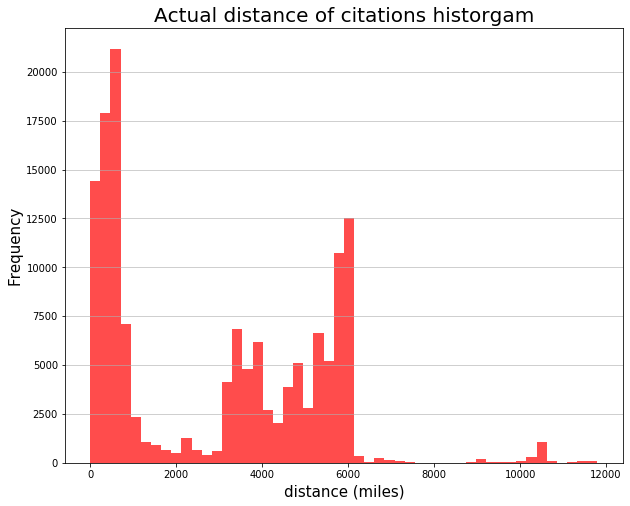

In [240]:
plt.figure(figsize=[10,8])
plt.hist(x=actual_distance_mean, bins = 50, color = "red", alpha = 0.7)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("distance (miles)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Actual distance of citations historgam",fontsize=20)

Text(0.5, 1.0, 'Actual distance of citations historgam')

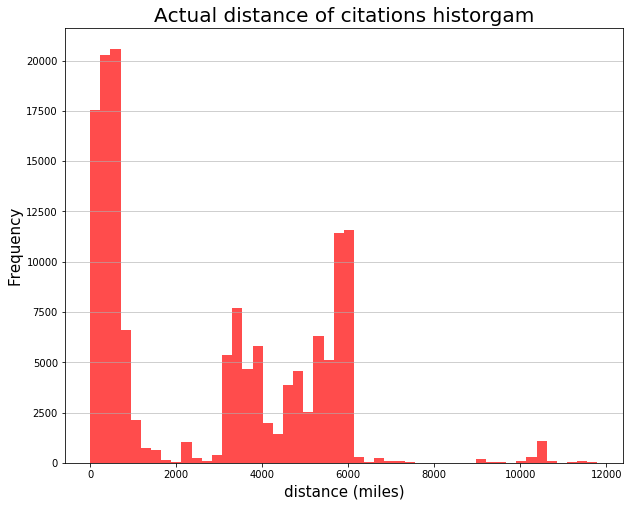

In [241]:
plt.figure(figsize=[10,8])
plt.hist(x=actual_distance_min, bins = 50, color = "red", alpha = 0.7)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("distance (miles)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Actual distance of citations historgam",fontsize=20)